Name-Vipul Anand

Batch-DSG0623

Project-Capstone Project(Web scraping phase file 1)

In this given capstone project the first thing we have to do is to web scrap the data so let us proceed with that.
We have to take care of the following things while scraping the data
BHK type--- 1 /2/3/4/5

Property type--- condo /budget homes

Beds----  Number of beds

Bathroom  ----Number of bathroom 

Balcony -----Number of Balcony 
Condo (Condominium): Can be equated to a "flat" or "apartment" in terms of individual ownership within a larger building, with shared common areas and amenities.

Budget Home: Refers to a "house" that is typically standalone, more affordable, and does not come with shared amenities or an HOA.
WE have to take atleast 10 different cities and each city should have a minimum of 100 entries.
And one more thing to be noted is that the labels based on which the models will be made must not contain any null values.
And the label are:-
 1.But total price
 
 2.Carpet area
 
 3.Property type

In [1]:
#Importing the librararies for web scraping
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
#Let us first extract the data from the city of delhi and after that we will do it for the other cities
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [ ]:
#Giving the city name as new delhi to extract the info from it
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('New Delhi')

In [ ]:
#CLicking on the flat because we will extact the flat data first
flat=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
flat.click()

In [ ]:
#Clicking on the search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [ ]:
#Scrolling down so that more and more data is available on the site
for i in range(15):
    driver.execute_script("window.scrollBy(0, 100000);")
    time.sleep(2)

In [ ]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:450]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

In [ ]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
Status=[]
FLoor=[]
Transaction_type=[]
Year_built=[]
Price_per_square_feet=[]
Furnished_status=[]
Facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [ ]:
#Code to extract the data from the sites
for i in CLick:
    try:
        i.click()
        driver.switch_to.window(driver.window_handles[-1])
    except:
        pass
    time.sleep(1.4)
    Property_type.append('condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('New Delhi')
    State.append('Delhi')
    State_code.append('07') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        carpetarea=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[1]').text
        Carpetarea.append(carpetarea)
    except:
        Carpetarea.append(np.nan)
    try:
        status=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[6]/div[2]').text
        Status.append(status)
    except:
        Status.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[4]/div[2]').text[0]
        FLoor.append(floor)
    except:
        FLoor.append(np.nan)
    try:
        transaction=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[5]/div[2]').text
        Transaction_type.append(transaction)
    except:
        Transaction_type.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        furnished=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[5]/div[2]').text.split('\n')[0]
        Furnished_status.append(furnished)
    except:
        Furnished_status.append(np.nan)
    try:
        facing=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[7]/div[2]').text
        Facing.append(facing)
    except:
        Facing.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass
    try:
        bhk_type.append(i.text[0])
    except:
        bhk_type.append(np.nan)

In [ ]:
#Making of the dataframe
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':Status,'FLoor':FLoor,'Transaction_type':Transaction_type,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':Furnished_status,'Facing':Facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_newdelhi1=pd.DataFrame(Property)

In [ ]:
data_newdelhi1

In [ ]:
data_newdelhi1.isna().sum()

In [ ]:
#There should be no nulls in the carper area which will be the label when we will make the ml models so let us delete
data_newdelhi1[data_newdelhi1['Carper_area'].isna()]

In [ ]:
data_newdelhi1=data_newdelhi1.drop(index=27)

In [ ]:
data_newdelhi1.isna().sum()

In [ ]:
#Now the data looks fine so now let us just save this the imputation of the nulls will be done later on
data_newdelhi1.to_csv('data_newdelhi.csv',index=False)

In [ ]:
#Now let us scrap the data for the houses/villa after extracting for the condos/apartements

In [ ]:
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [ ]:
#CLicking on house this time
driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]/label').click()

In [ ]:
#Clicking on the search
driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]').click()

In [ ]:
#Scrolling down so that more and more data is available on the site
for i in range(30):
    driver.execute_script("window.scrollBy(0, 1000000000000);")
    time.sleep(2)

In [ ]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:600]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

In [ ]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
Status=[]
FLoor=[]
Transaction_type=[]
Year_built=[]
Price_per_square_feet=[]
Furnished_status=[]
Facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [ ]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    try:
        CLick[i].click()
        driver.switch_to.window(driver.window_handles[-1])
    except:
        pass
    time.sleep(1.4)
    Property_type.append('budget homes')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('New Delhi')
    State.append('Delhi')
    State_code.append('07') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        carpetarea=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[1]').text
        Carpetarea.append(carpetarea)
    except:
        Carpetarea.append(np.nan)
    try:
        status=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[6]/div[2]').text
        Status.append(status)
    except:
        Status.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[4]/div[2]').text[0]
        FLoor.append(floor)
    except:
        FLoor.append(np.nan)
    try:
        transaction=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[5]/div[2]').text
        Transaction_type.append(transaction)
    except:
        Transaction_type.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        furnished=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[5]/div[2]').text.split('\n')[0]
        Furnished_status.append(furnished)
    except:
        Furnished_status.append(np.nan)
    try:
        facing=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[7]/div[2]').text
        Facing.append(facing)
    except:
        Facing.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        bhk_type.append(np.nan)

In [ ]:
#Making of the dataframe
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':Status,'FLoor':FLoor,'Transaction_type':Transaction_type,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':Furnished_status,'Facing':Facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_newdelhi2=pd.DataFrame(Property)

In [ ]:
data_newdelhi2

In [ ]:
data_newdelhi2.isna().sum()

In [ ]:
data_newdelhi2.to_csv('data_newdelhi2.csv')

In [ ]:
data_newdelhi2['Furnished_status'].value_counts()

In [ ]:
data_newdelhi2=  pd.read_csv('data_newdelhi2.csv')

In [ ]:
data_newdelhi2

In [ ]:
data_newdelhi2=data_newdelhi2.drop(columns='Unnamed: 0')

In [ ]:
data_newdelhi2.isna().sum()

In [ ]:
#There should be no nulls in the label so let us drop the columns where carpper_area is null

In [ ]:
data_newdelhi2=data_newdelhi2[data_newdelhi2['Carper_area'].isna()==False]

In [ ]:
data_newdelhi2.isna().sum()

In [ ]:
data_newdelhi2.head()

In [ ]:
#Let us drop save this dataframe now to use it later on
data_newdelhi2.to_csv('data_newdelhi2.csv',index=False)

In [ ]:
pd.read_csv('data_newdelhi2.csv')

In [ ]:
#Let us now do the scraping for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [ ]:
#Filling the city name as mumbai
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Mumbai')

In [ ]:
#We will search for the flats first so let us click
flats=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
flats.click()

In [ ]:
#CLicking on the search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [ ]:
#Scrolling down so that more and more data is available on the site
for i in range(30):
    driver.execute_script("window.scrollBy(0, 1000000000000);")
    time.sleep(2)

In [ ]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:600]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

In [ ]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
Status=[]
FLoor=[]
Transaction_type=[]
Year_built=[]
Price_per_square_feet=[]
Furnished_status=[]
Facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [ ]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    try:
        status=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
        Status.append(status)  
    except:
        Status.append(np.nan)
    try:
        CLick[i].click()
        driver.switch_to.window(driver.window_handles[-1])
    except:
        pass
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        carpetarea=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[1]').text
        Carpetarea.append(carpetarea)
    except:
        Carpetarea.append(np.nan)
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('New Delhi')
    State.append('Delhi')
    State_code.append('07') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[4]/div[2]').text[0]
        FLoor.append(floor)
    except:
        FLoor.append(np.nan)
    try:
        transaction=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[5]/div[2]').text
        Transaction_type.append(transaction)
    except:
        Transaction_type.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        furnished=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[5]/div[2]').text.split('\n')[0]
        Furnished_status.append(furnished)
    except:
        Furnished_status.append(np.nan)
    try:
        facing=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[7]/div[2]').text
        Facing.append(facing)
    except:
        Facing.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In the above mentioned code we have used continue statement 2 times because we do not want that the labels gets filled up with nulls that is why we have done this

In [ ]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':Status,'FLoor':FLoor,'Transaction_type':Transaction_type,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':Furnished_status,'Facing':Facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_mumbai=pd.DataFrame(Property)

In [ ]:
data_mumbai.isna().sum()

In [ ]:
data_mumbai.head()

In [ ]:
data_mumbai['City']=data_mumbai['City'].replace('New Delhi','Mumbai')

In [ ]:
data_mumbai['State']=data_mumbai['State'].replace('Delhi','Maharastra')

In [ ]:
data_mumbai['State_code']=data_mumbai['State_code'].replace('07','27')

In [ ]:
data_mumbai.head()

In [ ]:
data_mumbai.isna().sum()

In [ ]:
data_mumbai['Status'].value_counts()

In [ ]:
data_mumbai.to_csv('data_mumbai.csv',index=False)

In [ ]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [ ]:
#Clicking on the city of mumbai
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Mumbai')

In [ ]:
#Clicking on the flat because this time we will do it for the houses
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [ ]:
#Clicking on the search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [ ]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:500]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

In [ ]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
Status=[]
FLoor=[]
Transaction_type=[]
Year_built=[]
Price_per_square_feet=[]
Furnished_status=[]
Facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [ ]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    try:
        status=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
        Status.append(status)  
    except:
        Status.append(np.nan)
    try:
        floor=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
        FLoor.append(floor)  
    except:
        FLoor.append(np.nan)
    try:
        transaction=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
        Transaction_type.append(transaction)  
    except:
        Transaction_type.append(np.nan)
    try:
        furnish=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
        Furnished_status.append(furnish)  
    except:
        Furnished_status.append(np.nan)
    try:
        facing=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
        Facing.append(facing)  
    except:
        Facing.append(np.nan)
    try:
        CLick[i].click()
        driver.switch_to.window(driver.window_handles[-1])
    except:
        pass
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        carpetarea=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[1]').text
        Carpetarea.append(carpetarea)
    except:
        Carpetarea.append(np.nan)
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('New Delhi')
    State.append('Delhi')
    State_code.append('07') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [ ]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':Status,'FLoor':FLoor,'Transaction_type':Transaction_type,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':Furnished_status,'Facing':Facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_mumbai2=pd.DataFrame(Property)

In [ ]:
data_mumbai2

In [ ]:
data_mumbai2.isna().sum()

In [ ]:
data_mumbai2=data_mumbai2[data_mumbai2['Carper_area'].isna()==False]

In [ ]:
data_mumbai2.isna().sum()

In [ ]:
data_mumbai2.head()

In [ ]:
data_mumbai2.to_csv('data_mumbai2.csv',index=False)

In [ ]:
data_mumbai2

In [ ]:
data_mumbai2['Property_type']=data_mumbai2['Property_type'].replace('Condo','Budget Homes')

In [ ]:
data_mumbai2['State']=data_mumbai2['State'].replace('Delhi','Maharastra')
data_mumbai2['State_code']=data_mumbai2['State_code'].replace('07','27')
data_mumbai2['City']=data_mumbai2['City'].replace('Delhi','Mumbai')

In [ ]:
data_mumbai2['City']=data_mumbai2['City'].replace('New Delhi','Mumbai')

In [ ]:
data_mumbai2.head()

In [ ]:
data_mumbai2.to_csv('data_mumbai2.csv',index=False)

In [ ]:
pd.read_csv('data_mumbai2.csv')

Succesfully saved the column also.

In [ ]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [ ]:
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [ ]:
filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']

In [ ]:
status=[]
floor=[]
transaction=[]
furnishing=[]
facing=[]

In [ ]:
for i in range(20):
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)

In [ ]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    try:
        CLick[i].click()
        driver.switch_to.window(driver.window_handles[-1])
    except:
        pass
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        carpetarea=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[1]').text
        Carpetarea.append(carpetarea)
    except:
        Carpetarea.append(np.nan)
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('New Delhi')
    State.append('Delhi')
    State_code.append('07') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [ ]:
#Let us now scrap the data for the city of pune 

In [107]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [108]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Faridabd')

In [110]:
#Clicking on search because this time we will be searching for the flats/condo apartements
flats=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
flats.click()

In [111]:
#CLicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [85]:
driver.refresh()

In [112]:
for i in range(430):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()

In [118]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:400]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

400

In [172]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [174]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)c
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [190]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244


In [191]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_pune=pd.DataFrame(Property)

In [192]:
data_pune

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Garden/Park,"[1133, Sq-ft]",₹44.0 Lac,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,D,No/Rare Powercut,2,24 Hours Available
1,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"[Builder, Floor]",₹1.10 Cr,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,1,24 Hours Available,No/Rare Powercut,Puja Room
2,3,Condo,3,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"[Builder, Floor]",₹1.30 Cr,₹10.0 Lac,"Vitrified, Marble, Granite",NaN,D,No/Rare Powercut,1,24 Hours Available
3,4,Condo,4,4,2,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"[Builder, Floor]",₹1.80 Cr,₹2.0 Lac,"Vitrified, Marble, Granite",3,D,No/Rare Powercut,1,24 Hours Available
4,4,Condo,4,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,"Garden/Park, Main Road","[Builder, Floor]",₹70.0 Lac,"₹70,000",Ceramic Tiles,NaN,H,No/Rare Powercut,None,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2,Condo,2,NaN,NaN,"Sector 76, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[Flat, For]",₹43.1 Lac,"Sector 76, Faridabad, Delhi NCR",Study,NaN,NaN,NaN,NaN,NaN
240,3,Condo,3,3,2,"B450 green fields, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[Flat, For]",₹1.60 Cr,"Faridabad, Delhi NCR",Less than 5 years,S,NaN,NaN,NaN,NaN
241,4,Condo,4,NaN,NaN,"Sector 49, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[Builder, Floor]",₹1.0 Cr,"Sector 49, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
242,4,Condo,4,NaN,NaN,"Sector 63, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[2, BHK]",₹45.0 Lac,"Sector 63, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
data_pune.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 208
Balcony                  209
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                 19
Carper_area                0
Status                    10
FLoor                      0
Transaction_type           0
Year_built               115
Price_per_square_feet      0
Furnished_status           6
Facing                    72
Type_of_ownership         70
Total_area                 0
Buy_total_price            0
Booking_amount             0
Flooring                  47
Car Parking              210
Lift                     186
Water_availablity        145
Electricity              168
Additional               134
dtype: int64

In [194]:
data_pune1=data_pune[data_pune['Carper_area'].isna()==False]

In [196]:
data_pune1.to_csv('data_pune1.csv',index=False)

In [195]:
data_pune1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Garden/Park,"[1133, Sq-ft]",₹44.0 Lac,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,D,No/Rare Powercut,2,24 Hours Available
1,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"[Builder, Floor]",₹1.10 Cr,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,1,24 Hours Available,No/Rare Powercut,Puja Room
2,3,Condo,3,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"[Builder, Floor]",₹1.30 Cr,₹10.0 Lac,"Vitrified, Marble, Granite",NaN,D,No/Rare Powercut,1,24 Hours Available
3,4,Condo,4,4,2,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"[Builder, Floor]",₹1.80 Cr,₹2.0 Lac,"Vitrified, Marble, Granite",3,D,No/Rare Powercut,1,24 Hours Available
4,4,Condo,4,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,"Garden/Park, Main Road","[Builder, Floor]",₹70.0 Lac,"₹70,000",Ceramic Tiles,NaN,H,No/Rare Powercut,None,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2,Condo,2,NaN,NaN,"Sector 76, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[Flat, For]",₹43.1 Lac,"Sector 76, Faridabad, Delhi NCR",Study,NaN,NaN,NaN,NaN,NaN
240,3,Condo,3,3,2,"B450 green fields, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[Flat, For]",₹1.60 Cr,"Faridabad, Delhi NCR",Less than 5 years,S,NaN,NaN,NaN,NaN
241,4,Condo,4,NaN,NaN,"Sector 49, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[Builder, Floor]",₹1.0 Cr,"Sector 49, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
242,4,Condo,4,NaN,NaN,"Sector 63, Faridabad",Faridabad,Haryana,6,India,...,NaN,"[2, BHK]",₹45.0 Lac,"Sector 63, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
data_pune1['Furnished_status'].value_counts()

Furnished_status
Semi-Furnished    133
Unfurnished        78
Furnished          27
Name: count, dtype: int64

In [2]:
data_faidabad1=pd.read_csv('data_pune1.csv')

In [3]:
data_faidabad1.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Garden/Park,"['1133', 'Sq-ft']",₹44.0 Lac,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,D,No/Rare Powercut,2,24 Hours Available
1,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"['Builder', 'Floor']",₹1.10 Cr,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,1,24 Hours Available,No/Rare Powercut,Puja Room
2,3,Condo,3,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"['Builder', 'Floor']",₹1.30 Cr,₹10.0 Lac,"Vitrified, Marble, Granite",NaN,D,No/Rare Powercut,1,24 Hours Available
3,4,Condo,4,4.0,2,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"['Builder', 'Floor']",₹1.80 Cr,₹2.0 Lac,"Vitrified, Marble, Granite",3,D,No/Rare Powercut,1,24 Hours Available
4,4,Condo,4,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,"Garden/Park, Main Road","['Builder', 'Floor']",₹70.0 Lac,"₹70,000",Ceramic Tiles,NaN,H,No/Rare Powercut,NaN,24 Hours Available


In [4]:
data_faidabad1.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 208
Balcony                  209
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                 19
Carper_area                0
Status                    10
FLoor                      0
Transaction_type           0
Year_built               115
Price_per_square_feet      0
Furnished_status           6
Facing                    72
Type_of_ownership         70
Total_area                 0
Buy_total_price            0
Booking_amount             0
Flooring                  47
Car Parking              210
Lift                     186
Water_availablity        147
Electricity              173
Additional               135
dtype: int64

In [5]:
data_faidabad1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Garden/Park,"['1133', 'Sq-ft']",₹44.0 Lac,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,D,No/Rare Powercut,2,24 Hours Available
1,2,Condo,2,NaN,NaN,"Neharpar, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"['Builder', 'Floor']",₹1.10 Cr,₹1.0 Lac,"Vitrified, Ceramic Tiles",NaN,1,24 Hours Available,No/Rare Powercut,Puja Room
2,3,Condo,3,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"['Builder', 'Floor']",₹1.30 Cr,₹10.0 Lac,"Vitrified, Marble, Granite",NaN,D,No/Rare Powercut,1,24 Hours Available
3,4,Condo,4,4.0,2,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,Freehold,"['Builder', 'Floor']",₹1.80 Cr,₹2.0 Lac,"Vitrified, Marble, Granite",3,D,No/Rare Powercut,1,24 Hours Available
4,4,Condo,4,NaN,NaN,"Greenfield Colony, Faridabad",Faridabad,Haryana,6,India,...,"Garden/Park, Main Road","['Builder', 'Floor']",₹70.0 Lac,"₹70,000",Ceramic Tiles,NaN,H,No/Rare Powercut,NaN,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2,Condo,2,NaN,NaN,"Sector 76, Faridabad",Faridabad,Haryana,6,India,...,NaN,"['Flat', 'For']",₹43.1 Lac,"Sector 76, Faridabad, Delhi NCR",Study,NaN,NaN,NaN,NaN,NaN
240,3,Condo,3,3.0,2,"B450 green fields, Faridabad",Faridabad,Haryana,6,India,...,NaN,"['Flat', 'For']",₹1.60 Cr,"Faridabad, Delhi NCR",Less than 5 years,S,NaN,NaN,NaN,NaN
241,4,Condo,4,NaN,NaN,"Sector 49, Faridabad",Faridabad,Haryana,6,India,...,NaN,"['Builder', 'Floor']",₹1.0 Cr,"Sector 49, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
242,4,Condo,4,NaN,NaN,"Sector 63, Faridabad",Faridabad,Haryana,6,India,...,NaN,"['2', 'BHK']",₹45.0 Lac,"Sector 63, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_faidabad1.to_csv('data_faridabad1.csv')

In [7]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [8]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Faridabd')

In [9]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [10]:
#CLicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [11]:
for i in range(400):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [12]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:340]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

340

In [13]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [15]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [24]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154


In [25]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_faridabad2=pd.DataFrame(Property)

In [27]:
pd.set_option('display.max_columns',None)

In [28]:
data_faridabad2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,1,Condo,1,NaN,NaN,"Sector 88, Faridabad",Faridabad,Haryana,6,India,Near by k. R manglam school amrita hospital ol...,120 sqyrd,Ready to Move,NaN,Resale,None of these,"₹1,16,667/sqyrd",Semi-Furnished,North,Freehold,"[For, Sale]",₹1.40 Cr,₹1.0 Lac,"Ceramic Tiles, Vitrified, Wooden",NaN,NaN,No/Rare Powercut,Haryana Urban Development Authority,24 Hours Available
1,4,Condo,4,3,2,"Sector 84, Faridabad",Faridabad,Haryana,6,India,near bptp d block market,2500 sqft,Ready to Move,NaN,Resale,Store,"₹11,600/sqft",Semi-Furnished,North,Main Road,"[For, Sale]",₹2.90 Cr,₹5.0 Lac,"Ceramic Tiles, Granite, Marble, Vitrified, Wooden",2,NaN,No/Rare Powercut,NaN,24 Hours Available
2,4,Condo,4,5,4,"Sector 16, Faridabad",Faridabad,Haryana,6,India,Near to Mathura Agra Expressway,2000 sqft,Ready to Move,2 out of 2,Resale,"Puja Room, Store","₹11,500/sqft",Semi-Furnished,North - East,Garden/Park,"[Residential, House]",₹2.30 Cr,₹1.0 Lac,"Vitrified, Ceramic Tiles, Marble, Granite",S,H,No/Rare Powercut,2,24 Hours Available
3,3,Condo,3,NaN,NaN,"Sector 89, Faridabad",Faridabad,Haryana,6,India,"school, hospital, metro station, railway stati...",1550 sqft,Ready to Move,NaN,Resale,"Puja Room, Store, Servant Room","₹7,097/sqft",Semi-Furnished,East,"Garden/Park, Main Road","[For, Sale]",₹1.10 Cr,120 of 2017,"Ceramic Tiles, Wooden",NaN,NaN,No/Rare Powercut,NaN,24 Hours Available
4,3,Condo,3,NaN,NaN,,Faridabad,Haryana,6,India,NaN,1258 sqft,Ready to Move,1 out of 2,Resale,1,"₹5,485/sqft",Unfurnished,East,Less than 5 years,"[Residential, House]",₹69.0 Lac,"Sector 77, Faridabad, Sector 85, Faridabad, De...",Freehold,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,4,Condo,4,NaN,NaN,"Gandhi Colony, Faridabad",Faridabad,Haryana,6,India,NaN,1600 sqft,Ready to Move,Ground out of 1,Resale,NaN,NaN,Semi-Furnished,NaN,NaN,"[Owner, Residential]",Call for Price,"Gandhi Colony, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
150,2,Condo,2,NaN,NaN,"Khori Jamalpur, Faridabad",Faridabad,Haryana,6,India,NaN,250 sqyrd,Ready to Move,NaN,Resale,NaN,NaN,Unfurnished,NaN,NaN,"[For, Sale]",Call for Price,"Khori Jamalpur, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
151,2,Condo,2,NaN,NaN,"Chajjan Nagar Village, Faridabad",Faridabad,Haryana,6,India,Freehold,1050 sqft,Ready to Move,Ground out of 1,Resale,NaN,NaN,Unfurnished,East,NaN,"[Owner, Residential]",Call for Price,"House no 86, Street no2 chajjan nagar, tilpat ...","Store, Study",NaN,NaN,NaN,NaN,NaN
152,5,Condo,5,NaN,NaN,"Fruit Garden, Faridabad",Faridabad,Haryana,6,India,Freehold,3700 sqft,Ready to Move,2 out of 3,Resale,NaN,NaN,Unfurnished,North,NaN,"[Owner, Residential]",Call for Price,"Fruit Garden, Faridabad, Delhi NCR",New Construction,NaN,NaN,NaN,NaN,NaN


In [29]:
data_faridabad2.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 104
Balcony                  105
Address                    1
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                 18
Carper_area                0
Status                     5
FLoor                     70
Transaction_type           0
Year_built               102
Price_per_square_feet     18
Furnished_status          11
Facing                    62
Type_of_ownership         76
Total_area                 0
Buy_total_price            0
Booking_amount             0
Flooring                  57
Car Parking              115
Lift                     139
Water_availablity        120
Electricity              131
Additional               108
dtype: int64

In [31]:
data_faridabad2['Property_type']=data_faridabad2['Property_type'].replace('Condo','Budget Homes')

In [32]:
data_faridabad2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,1,Budget Homes,1,NaN,NaN,"Sector 88, Faridabad",Faridabad,Haryana,6,India,Near by k. R manglam school amrita hospital ol...,120 sqyrd,Ready to Move,NaN,Resale,None of these,"₹1,16,667/sqyrd",Semi-Furnished,North,Freehold,"[For, Sale]",₹1.40 Cr,₹1.0 Lac,"Ceramic Tiles, Vitrified, Wooden",NaN,NaN,No/Rare Powercut,Haryana Urban Development Authority,24 Hours Available
1,4,Budget Homes,4,3,2,"Sector 84, Faridabad",Faridabad,Haryana,6,India,near bptp d block market,2500 sqft,Ready to Move,NaN,Resale,Store,"₹11,600/sqft",Semi-Furnished,North,Main Road,"[For, Sale]",₹2.90 Cr,₹5.0 Lac,"Ceramic Tiles, Granite, Marble, Vitrified, Wooden",2,NaN,No/Rare Powercut,NaN,24 Hours Available
2,4,Budget Homes,4,5,4,"Sector 16, Faridabad",Faridabad,Haryana,6,India,Near to Mathura Agra Expressway,2000 sqft,Ready to Move,2 out of 2,Resale,"Puja Room, Store","₹11,500/sqft",Semi-Furnished,North - East,Garden/Park,"[Residential, House]",₹2.30 Cr,₹1.0 Lac,"Vitrified, Ceramic Tiles, Marble, Granite",S,H,No/Rare Powercut,2,24 Hours Available
3,3,Budget Homes,3,NaN,NaN,"Sector 89, Faridabad",Faridabad,Haryana,6,India,"school, hospital, metro station, railway stati...",1550 sqft,Ready to Move,NaN,Resale,"Puja Room, Store, Servant Room","₹7,097/sqft",Semi-Furnished,East,"Garden/Park, Main Road","[For, Sale]",₹1.10 Cr,120 of 2017,"Ceramic Tiles, Wooden",NaN,NaN,No/Rare Powercut,NaN,24 Hours Available
4,3,Budget Homes,3,NaN,NaN,,Faridabad,Haryana,6,India,NaN,1258 sqft,Ready to Move,1 out of 2,Resale,1,"₹5,485/sqft",Unfurnished,East,Less than 5 years,"[Residential, House]",₹69.0 Lac,"Sector 77, Faridabad, Sector 85, Faridabad, De...",Freehold,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,4,Budget Homes,4,NaN,NaN,"Gandhi Colony, Faridabad",Faridabad,Haryana,6,India,NaN,1600 sqft,Ready to Move,Ground out of 1,Resale,NaN,NaN,Semi-Furnished,NaN,NaN,"[Owner, Residential]",Call for Price,"Gandhi Colony, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
150,2,Budget Homes,2,NaN,NaN,"Khori Jamalpur, Faridabad",Faridabad,Haryana,6,India,NaN,250 sqyrd,Ready to Move,NaN,Resale,NaN,NaN,Unfurnished,NaN,NaN,"[For, Sale]",Call for Price,"Khori Jamalpur, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
151,2,Budget Homes,2,NaN,NaN,"Chajjan Nagar Village, Faridabad",Faridabad,Haryana,6,India,Freehold,1050 sqft,Ready to Move,Ground out of 1,Resale,NaN,NaN,Unfurnished,East,NaN,"[Owner, Residential]",Call for Price,"House no 86, Street no2 chajjan nagar, tilpat ...","Store, Study",NaN,NaN,NaN,NaN,NaN
152,5,Budget Homes,5,NaN,NaN,"Fruit Garden, Faridabad",Faridabad,Haryana,6,India,Freehold,3700 sqft,Ready to Move,2 out of 3,Resale,NaN,NaN,Unfurnished,North,NaN,"[Owner, Residential]",Call for Price,"Fruit Garden, Faridabad, Delhi NCR",New Construction,NaN,NaN,NaN,NaN,NaN


In [33]:
data_faridabad2.to_csv('data_faridabad.csv',index=False)

In [45]:
#Now let us scrap for the city of luckhnow
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [46]:
#Filling the city name as Noida
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Luckhnow')

In [48]:
#Clicking on search because this time we will be searching for the flats/condo apartements
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
city.click()

In [49]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [50]:
for i in range(410):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        pass
#To click on the > to get all the important info

In [51]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:380]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

380

In [52]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [53]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [55]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234


In [56]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_luckhnow1=pd.DataFrame(Property)

In [57]:
data_luckhnow1.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 234
Balcony                  234
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  1
Carper_area                0
Status                    66
FLoor                     14
Transaction_type           0
Year_built               109
Price_per_square_feet      0
Furnished_status           1
Facing                    66
Type_of_ownership         70
Total_area                 1
Buy_total_price            1
Booking_amount             1
Flooring                  33
Car Parking              234
Lift                     161
Water_availablity        135
Electricity              144
Additional               120
dtype: int64

In [6]:
data_luckhnow1=pd.read_csv('data_luckhnow1.csv')

In [8]:
data_luckhnow1['City']=data_luckhnow1['City'].replace('Faridabad','Luckhnow')
data_luckhnow1['State']=data_luckhnow1['State'].replace('Haryana','U.P')
data_luckhnow1['State_code']=data_luckhnow1['State_code'].replace('06','09')

In [9]:
data_luckhnow1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,2,Condo,2,NaN,NaN,"Amar Shaheed Path, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['1482', 'Sq-ft']",₹1.03 Cr,"Amar Shaheed Path, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Sushant Golf City, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['1761', 'Sq-ft']",₹1.30 Cr,"Sushant Golf City, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
2,4,Condo,4,NaN,NaN,"Gomtinagar Extension, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['For', 'Sale']",₹3.21 Cr,"Gomtinagar Extension, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
3,2,Condo,2,NaN,NaN,"Sushant Golf City, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['1154', 'Sq-ft']",₹84.6 Lac,"Sushant Golf City, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
4,2,Condo,2,NaN,NaN,"Sushant Golf City, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['1154', 'Sq-ft']",₹84.6 Lac,"Sushant Golf City, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,4,Condo,4,NaN,NaN,"Faizabad Road, Lucknow",Luckhnow,U.P,6,India,...,Garden/Park,"['Builder', 'Floor']",₹90.0 Lac,₹2.0 Lac,Ceramic Tiles,NaN,L,No/Rare Powercut,NaN,24 Hours Available
230,3,Condo,3,NaN,NaN,"The Mall Avenue, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['3', 'BHK']",₹60.0 Lac,"Clay Square Apartments, The Mall Avenue, Luckn...",5 to 10 years,NaN,NaN,NaN,NaN,NaN
231,2,Condo,2,NaN,NaN,"Anubhuti Apartments, Lucknow",Luckhnow,U.P,6,India,...,Study,"['Flat', 'For']",₹33.5 Lac,"Anubhuti Apartments, Aliganj, Sector CS, Near ...","Garden/Park, Main Road",NaN,NaN,NaN,NaN,NaN
232,3,Condo,3,NaN,NaN,"LANDMARK APARTMENT, Lucknow",Luckhnow,U.P,6,India,...,NaN,"['Flat', 'For']",₹75.0 Lac,₹5.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN


In [10]:
data_luckhnow1.to_csv('data_luckhnow1.csv')

In [11]:
#Let us do for the city of luchnow for budget homes

In [12]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [13]:
#Filling the city name as Luckhnow
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Luckhnow')

In [14]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [15]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [16]:
for i in range(400):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        pass
#To click on the > to get all the important info

In [17]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:380]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

380

In [19]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [20]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[3]/div[2]/ul/li[1]/div[2]/div[2]').text
        Price_per_square_feet.append(price)
    except:
        Price_per_square_feet.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        total=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[1]/div[1]').text
        Buy_total_price.append(total)
    except:
        Buy_total_price.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [24]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293
293


In [25]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_luckhnow2=pd.DataFrame(Property)

In [28]:
data_luckhnow2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,6,Condo,6,NaN,NaN,"Gomtinagar Extension, Lucknow",Faridabad,Haryana,6,India,Estimated EMI: ₹198928\nApply for Home Loan,3968 sqft,NaN,NaN,New Property,NaN,"₹11,116/sqft",Unfurnished,NaN,NaN,"[For, Sale]",₹4.41 Cr,"Gomtinagar Extension, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
1,6,Condo,6,NaN,NaN,"Gomtinagar Extension, Lucknow",Faridabad,Haryana,6,India,Estimated EMI: ₹198928\nApply for Home Loan,3968 sqft,NaN,NaN,New Property,NaN,"₹11,116/sqft",Unfurnished,NaN,NaN,"[For, Sale]",₹4.41 Cr,"Gomtinagar Extension, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
2,2,Condo,2,NaN,NaN,"Sushant Golf City, Lucknow",Faridabad,Haryana,6,India,"Sushant Golf City, Sushant Golf City, Lucknow,...",1400 sqft,Ready to Move,Ground out of 1,Resale,Store,"₹16,286/sqft",Semi-Furnished,North - West,Freehold,"[Residential, House]",₹2.28 Cr,₹10.0 Lac,Semi-Furnished,NaN,L,No/Rare Powercut,3,24 Hours Available
3,4,Condo,4,NaN,NaN,"Raibareli Road, Lucknow",Faridabad,Haryana,6,India,NaN,2214 sqft,NaN,NaN,Resale,Garden/Park,"₹6,549/sqft",Furnished,North,Estimated EMI: ₹65397\nApply for Home Loan,"[For, Sale]",₹1.45 Cr,₹10.0 Lac,Furnished,NaN,N,Store,24 Hours Available,Under Construction
4,2,Condo,2,NaN,NaN,"Sushant Golf City, Lucknow",Faridabad,Haryana,6,India,Seth Anandram Jaipuriya aschool,1400 sqft,Ready to Move,NaN,Resale,None of these,"₹26,071/sqft",Semi-Furnished,North - East,"Garden/Park, Main Road","[For, Sale]",₹3.65 Cr,₹5.0 Lac,"Ceramic Tiles, Granite, Marble, Marbonite, Mos...",NaN,NaN,No/Rare Powercut,NaN,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,3,Condo,3,NaN,NaN,,Faridabad,Haryana,6,India,Scooter India chauraha,2000 sqft,Ready to Move,NaN,Resale,NaN,"₹4,500/sqft",NaN,East,"Puja Room, Store","[Residential, House]",₹45.0 Lac,₹2.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN
289,3,Condo,3,NaN,NaN,"Bharwara near stp chauraha, Lucknow",Faridabad,Haryana,6,India,4,1250 sqft,Ready to Move,Ground out of 1,Resale,NaN,"₹6,000/sqft",Furnished,East,NaN,"[For, Sale]",₹60.0 Lac,"Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
290,4,Condo,4,NaN,NaN,,Faridabad,Haryana,6,India,Furnished,1000 sqft,Ready to Move,1 out of 2,New Property,NaN,"₹7,250/sqft",Unfurnished,North - East,"Store, Study, Servant Room","[Residential, House]",₹1.45 Cr,₹1.0 Lac,"Garden/Park, Main Road",NaN,NaN,NaN,NaN,NaN
291,2,Condo,2,NaN,NaN,"Shaurya Vihar Colony, Lucknow",Faridabad,Haryana,6,India,Semi-Furnished,1100 sqft,Ready to Move,NaN,Resale,24 Hours Available,"₹5,200/sqft",Unfurnished,NaN,5 to 10 years,"[For, Sale]",₹65.0 Lac,"2763, Shaurya Vihar Colony, 60 Feet Road, Jank...",Freehold,NaN,NaN,1,NaN,No/Rare Powercut


In [29]:
data_luckhnow2.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 293
Balcony                  293
Address                    2
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  8
Carper_area                0
Status                    30
FLoor                    134
Transaction_type           2
Year_built               159
Price_per_square_feet      3
Furnished_status          29
Facing                    74
Type_of_ownership         94
Total_area                 0
Buy_total_price            0
Booking_amount             1
Flooring                  52
Car Parking              293
Lift                     245
Water_availablity        199
Electricity              218
Additional               180
dtype: int64

In [31]:
for i in range(20):
    print(driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text)

₹7,000 per sqft
₹7,000 per sqft
₹11,655 per sqft
₹6,278 per sqft
₹16,286 per sqft
₹5,223 per sqft
₹14,600 per sqft
₹5,000 per sqft
₹3,522 per sqft
₹3,542 per sqft
₹3,438 per sqft
₹4,375 per sqft
₹11,632 per sqft
₹8,013 per sqft
₹9,286 per sqft
₹10,496 per sqft
₹5,714 per sqft
₹5,167 per sqft
₹3,655 per sqft
₹7,718 per sqft


In [44]:
a=[]
for i in range(20):
    a.append(driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].texti.split('\n')[1])
a

['₹\n4.41 Cr',
 '₹\n4.41 Cr',
 '₹\n2.50 Cr',
 '₹\n2.42 Cr',
 '₹\n2.28 Cr',
 '₹\n1.45 Cr',
 '₹\n3.65 Cr',
 '₹\n55 Lac',
 '₹\n40.5 Lac',
 '₹\n42.5 Lac',
 '₹\n55 Lac',
 '₹\n1.75 Cr',
 '₹\n2.21 Cr',
 '₹\n1.25 Cr',
 '₹\n1.30 Cr',
 '₹\n6.10 Cr',
 '₹\n1.40 Cr',
 '₹\n1.55 Cr',
 '₹\n42.4 Lac',
 '₹\n1.38 Cr']

In [45]:
data_luckhnow2.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 293
Balcony                  293
Address                    2
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  8
Carper_area                0
Status                    30
FLoor                    134
Transaction_type           2
Year_built               159
Price_per_square_feet      3
Furnished_status          29
Facing                    74
Type_of_ownership         94
Total_area                 0
Buy_total_price            0
Booking_amount             1
Flooring                  52
Car Parking              293
Lift                     245
Water_availablity        199
Electricity              218
Additional               180
dtype: int64

In [46]:
data_luckhnow2.to_csv('data_luckhnow2.csv')

In [49]:
for i in a:
    print(i.split('\n')[1])

4.41 Cr
4.41 Cr
2.50 Cr
2.42 Cr
2.28 Cr
1.45 Cr
3.65 Cr
55 Lac
40.5 Lac
42.5 Lac
55 Lac
1.75 Cr
2.21 Cr
1.25 Cr
1.30 Cr
6.10 Cr
1.40 Cr
1.55 Cr
42.4 Lac
1.38 Cr


In [50]:
#Let us do the same thing for the city of patna
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [ ]:
#Filling the city name as Patna
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Patna')

In [52]:
data_luckhnow2['Property_type']=data_luckhnow2['Property_type'].replace('Condo','Budget homes')
data_luckhnow2['City']=data_luckhnow2['City'].replace('Faridabad','Luckhnow')
data_luckhnow2['State']=data_luckhnow2['State'].replace('Haryana','U.P')
data_luckhnow2['State_code']=data_luckhnow2['State_code'].replace('6','09')

In [53]:
data_luckhnow2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,6,Budget homes,6,NaN,NaN,"Gomtinagar Extension, Lucknow",Luckhnow,U.P,09,India,Estimated EMI: ₹198928\nApply for Home Loan,3968 sqft,NaN,NaN,New Property,NaN,"₹11,116/sqft",Unfurnished,NaN,NaN,"[For, Sale]",₹4.41 Cr,"Gomtinagar Extension, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
1,6,Budget homes,6,NaN,NaN,"Gomtinagar Extension, Lucknow",Luckhnow,U.P,09,India,Estimated EMI: ₹198928\nApply for Home Loan,3968 sqft,NaN,NaN,New Property,NaN,"₹11,116/sqft",Unfurnished,NaN,NaN,"[For, Sale]",₹4.41 Cr,"Gomtinagar Extension, Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
2,2,Budget homes,2,NaN,NaN,"Sushant Golf City, Lucknow",Luckhnow,U.P,09,India,"Sushant Golf City, Sushant Golf City, Lucknow,...",1400 sqft,Ready to Move,Ground out of 1,Resale,Store,"₹16,286/sqft",Semi-Furnished,North - West,Freehold,"[Residential, House]",₹2.28 Cr,₹10.0 Lac,Semi-Furnished,NaN,L,No/Rare Powercut,3,24 Hours Available
3,4,Budget homes,4,NaN,NaN,"Raibareli Road, Lucknow",Luckhnow,U.P,09,India,NaN,2214 sqft,NaN,NaN,Resale,Garden/Park,"₹6,549/sqft",Furnished,North,Estimated EMI: ₹65397\nApply for Home Loan,"[For, Sale]",₹1.45 Cr,₹10.0 Lac,Furnished,NaN,N,Store,24 Hours Available,Under Construction
4,2,Budget homes,2,NaN,NaN,"Sushant Golf City, Lucknow",Luckhnow,U.P,09,India,Seth Anandram Jaipuriya aschool,1400 sqft,Ready to Move,NaN,Resale,None of these,"₹26,071/sqft",Semi-Furnished,North - East,"Garden/Park, Main Road","[For, Sale]",₹3.65 Cr,₹5.0 Lac,"Ceramic Tiles, Granite, Marble, Marbonite, Mos...",NaN,NaN,No/Rare Powercut,NaN,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,3,Budget homes,3,NaN,NaN,,Luckhnow,U.P,09,India,Scooter India chauraha,2000 sqft,Ready to Move,NaN,Resale,NaN,"₹4,500/sqft",NaN,East,"Puja Room, Store","[Residential, House]",₹45.0 Lac,₹2.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN
289,3,Budget homes,3,NaN,NaN,"Bharwara near stp chauraha, Lucknow",Luckhnow,U.P,09,India,4,1250 sqft,Ready to Move,Ground out of 1,Resale,NaN,"₹6,000/sqft",Furnished,East,NaN,"[For, Sale]",₹60.0 Lac,"Lucknow, Uttar Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
290,4,Budget homes,4,NaN,NaN,,Luckhnow,U.P,09,India,Furnished,1000 sqft,Ready to Move,1 out of 2,New Property,NaN,"₹7,250/sqft",Unfurnished,North - East,"Store, Study, Servant Room","[Residential, House]",₹1.45 Cr,₹1.0 Lac,"Garden/Park, Main Road",NaN,NaN,NaN,NaN,NaN
291,2,Budget homes,2,NaN,NaN,"Shaurya Vihar Colony, Lucknow",Luckhnow,U.P,09,India,Semi-Furnished,1100 sqft,Ready to Move,NaN,Resale,24 Hours Available,"₹5,200/sqft",Unfurnished,NaN,5 to 10 years,"[For, Sale]",₹65.0 Lac,"2763, Shaurya Vihar Colony, 60 Feet Road, Jank...",Freehold,NaN,NaN,1,NaN,No/Rare Powercut


In [54]:
data_luckhnow2.to_csv('data_luckhnow2.csv',index=False)

In [62]:
#let us now scrap the data for the houses for the city of gurgaon
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [63]:
#Filling the city name as Patna
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Gurgaon')

In [64]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [65]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [66]:
for i in range(380):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        pass
#To click on the > to get all the important info

In [69]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:320]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

320

In [71]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [73]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [82]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]
for  i in variable_list:
    print(len(i))

236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236


In [104]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_gurgaon1=pd.DataFrame(Property)

In [94]:
pd.set_option('display.max_rows',None)

In [105]:
data_gurgaon1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,4,3,"Sector 54, Gurgaon",Faridabad,Haryana,6,India,"Sector 43, Sector 54, Gurgaon, Delhi NCR",1800 sqft,Ready to Move,4 out of 4,New Property,New Construction,"₹11,562 per sqft",Semi-Furnished,North,Freehold,"[Builder, Floor]",3.70 Cr,₹2.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,S,NaN,NaN,NaN,"Puja Room, Store, Study, Servant Room"
1,3,Condo,3,NaN,2,"South City 1, Gurgaon",Faridabad,Haryana,6,India,K R manglam University,1800 sqft,Ready to Move,4 out of 4,New Property,Servant Room,"₹11,562 per sqft",Semi-Furnished,North,"Garden/Park, Pool, Main Road","[Builder, Floor]",2.67 Cr,₹1.0 Lac,"Vitrified, Wooden",1,NaN,No/Rare Powercut,1,24 Hours Available
2,4,Condo,4,4,3,"Sector 66, Gurgaon",Faridabad,Haryana,6,India,Golf Course Extension Road,1600 sqft,Ready to Move,1 out of 4,New Property,5 to 10 years,"₹14,833 per sqft",Semi-Furnished,North - East,Freehold,"[1900, Sq-ft]",3.30 Cr,"₹50,000","Vitrified, Wooden",2,2,24 Hours Available,No/Rare Powercut,"Puja Room, Study"
3,4,Condo,4,4,4,"New Gurgaon, Gurgaon",Faridabad,Haryana,6,India,This project is close to Bestech Sanskriti,1500 sqft,Ready to Move,NaN,Resale,Servant Room,"₹17,368 per sqft",Semi-Furnished,North - East,Freehold,"[Builder, Floor]",2.40 Cr,₹5.0 Lac,"Vitrified, Wooden",2,D,No/Rare Powercut,2,24 Hours Available
4,1,Condo,1,5,2,"Sushant Lok, Gurgaon",Faridabad,Haryana,6,India,Near by galleria Market,250 sqyrd,Ready to Move,2 out of 4,New Property,New Construction,"₹10,667 per sqft",Semi-Furnished,North - East,Freehold,"[Builder, Floor]",3.50 Cr,₹1.0 Lac,Marble,2,R,No/Rare Powercut,1,24 Hours Available
5,4,Condo,4,4,NaN,"Sector 63, Gurgaon",Faridabad,Haryana,6,India,"Sector 63, Gurgaon, Sector 63, Gurgaon, Delhi NCR",1900 sqft,Ready to Move,1 out of 4,Resale,Under Construction,"₹12,963 per sqft",Semi-Furnished,North,Freehold,"[3950, Sq-ft]",8 Cr,₹10.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,3,4,24 Hours Available,No/Rare Powercut,Servant Room
6,4,Condo,4,4,2,"Malibu Town, Gurgaon",Faridabad,Haryana,6,India,"shubhash chowk, good earth mall , park hospita...",2500 sqft,NaN,17 out of 34,Resale,Servant Room,"₹20,253 per sqft",Semi-Furnished,North - East,Freehold,"[Builder, Floor]",3.50 Cr,₹10.0 Lac,"Marble, Wooden",2,H,No/Rare Powercut,1,24 Hours Available
7,3,Condo,3,3,NaN,"Golf Course Extension Road, Gurgaon",Faridabad,Haryana,6,India,"Trehan luxury floor sec 71, close to upcoming ...",2800 sqft,Ready to Move,1 out of 4,New Property,Under Construction,"₹11,667 per sqft",Semi-Furnished,East,Freehold,"[1650, Sq-ft]",2.15 Cr,₹5.0 Lac,"Ceramic Tiles, Marble, Marbonite, Wooden",1,2,24 Hours Available,No/Rare Powercut,"Puja Room, Study, Store"
8,5,Condo,5,NaN,4,"New Gurgaon, Gurgaon",Faridabad,Haryana,6,India,near Dwarka expressway new gurgaon,1350 sqft,NaN,1 out of 3,New Property,Less than 5 years,"₹13,030 per sqft",Semi-Furnished,North - East,Freehold,"[5320, Sq-ft]",4.50 Cr,₹10.0 Lac,Vitrified,2,2,24 Hours Available,No/Rare Powercut,"Puja Room, Study, Store, Servant Room"
9,3,Condo,3,4,3,"Sector 92, Gurgaon",Faridabad,Haryana,6,India,"Sector 92, Gurgaon, Haryana, Sector 92, Gurgao...",4800 sqft,Ready to Move,9 out of 14,Resale,Garden/Park,"₹8,459 per sqft",Semi-Furnished,East,Estimated EMI: ₹90203\nApply for Home Loan,"[1995, Sq-ft]",2 Cr,₹2.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,1,N,Servant Room,24 Hours Available,Less than 5 years


In [106]:
data_gurgaon1.isna().sum()

BHk_type                  2
Property_type             2
Beds                      2
Bathroom                 27
Balcony                  25
Address                   2
City                      2
State                     2
State_code                2
Country                   2
Landmarks                 2
Carper_area               1
Status                   38
FLoor                    11
Transaction_type          1
Year_built               24
Price_per_square_feet     1
Furnished_status          1
Facing                   17
Type_of_ownership        11
Total_area                2
Buy_total_price           2
Booking_amount            2
Flooring                  8
Car Parking              23
Lift                     66
Water_availablity        35
Electricity              45
Additional               29
dtype: int64

In [108]:
data_gurgaon1=data_gurgaon1[data_gurgaon1['Carper_area'].isna()==False]

In [109]:
data_gurgaon1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,4,3,"Sector 54, Gurgaon",Faridabad,Haryana,6,India,"Sector 43, Sector 54, Gurgaon, Delhi NCR",1800 sqft,Ready to Move,4 out of 4,New Property,New Construction,"₹11,562 per sqft",Semi-Furnished,North,Freehold,"[Builder, Floor]",3.70 Cr,₹2.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,S,NaN,NaN,NaN,"Puja Room, Store, Study, Servant Room"
1,3,Condo,3,NaN,2,"South City 1, Gurgaon",Faridabad,Haryana,6,India,K R manglam University,1800 sqft,Ready to Move,4 out of 4,New Property,Servant Room,"₹11,562 per sqft",Semi-Furnished,North,"Garden/Park, Pool, Main Road","[Builder, Floor]",2.67 Cr,₹1.0 Lac,"Vitrified, Wooden",1,NaN,No/Rare Powercut,1,24 Hours Available
2,4,Condo,4,4,3,"Sector 66, Gurgaon",Faridabad,Haryana,6,India,Golf Course Extension Road,1600 sqft,Ready to Move,1 out of 4,New Property,5 to 10 years,"₹14,833 per sqft",Semi-Furnished,North - East,Freehold,"[1900, Sq-ft]",3.30 Cr,"₹50,000","Vitrified, Wooden",2,2,24 Hours Available,No/Rare Powercut,"Puja Room, Study"
3,4,Condo,4,4,4,"New Gurgaon, Gurgaon",Faridabad,Haryana,6,India,This project is close to Bestech Sanskriti,1500 sqft,Ready to Move,NaN,Resale,Servant Room,"₹17,368 per sqft",Semi-Furnished,North - East,Freehold,"[Builder, Floor]",2.40 Cr,₹5.0 Lac,"Vitrified, Wooden",2,D,No/Rare Powercut,2,24 Hours Available
4,1,Condo,1,5,2,"Sushant Lok, Gurgaon",Faridabad,Haryana,6,India,Near by galleria Market,250 sqyrd,Ready to Move,2 out of 4,New Property,New Construction,"₹10,667 per sqft",Semi-Furnished,North - East,Freehold,"[Builder, Floor]",3.50 Cr,₹1.0 Lac,Marble,2,R,No/Rare Powercut,1,24 Hours Available
5,4,Condo,4,4,NaN,"Sector 63, Gurgaon",Faridabad,Haryana,6,India,"Sector 63, Gurgaon, Sector 63, Gurgaon, Delhi NCR",1900 sqft,Ready to Move,1 out of 4,Resale,Under Construction,"₹12,963 per sqft",Semi-Furnished,North,Freehold,"[3950, Sq-ft]",8 Cr,₹10.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,3,4,24 Hours Available,No/Rare Powercut,Servant Room
6,4,Condo,4,4,2,"Malibu Town, Gurgaon",Faridabad,Haryana,6,India,"shubhash chowk, good earth mall , park hospita...",2500 sqft,NaN,17 out of 34,Resale,Servant Room,"₹20,253 per sqft",Semi-Furnished,North - East,Freehold,"[Builder, Floor]",3.50 Cr,₹10.0 Lac,"Marble, Wooden",2,H,No/Rare Powercut,1,24 Hours Available
7,3,Condo,3,3,NaN,"Golf Course Extension Road, Gurgaon",Faridabad,Haryana,6,India,"Trehan luxury floor sec 71, close to upcoming ...",2800 sqft,Ready to Move,1 out of 4,New Property,Under Construction,"₹11,667 per sqft",Semi-Furnished,East,Freehold,"[1650, Sq-ft]",2.15 Cr,₹5.0 Lac,"Ceramic Tiles, Marble, Marbonite, Wooden",1,2,24 Hours Available,No/Rare Powercut,"Puja Room, Study, Store"
8,5,Condo,5,NaN,4,"New Gurgaon, Gurgaon",Faridabad,Haryana,6,India,near Dwarka expressway new gurgaon,1350 sqft,NaN,1 out of 3,New Property,Less than 5 years,"₹13,030 per sqft",Semi-Furnished,North - East,Freehold,"[5320, Sq-ft]",4.50 Cr,₹10.0 Lac,Vitrified,2,2,24 Hours Available,No/Rare Powercut,"Puja Room, Study, Store, Servant Room"
9,3,Condo,3,4,3,"Sector 92, Gurgaon",Faridabad,Haryana,6,India,"Sector 92, Gurgaon, Haryana, Sector 92, Gurgao...",4800 sqft,Ready to Move,9 out of 14,Resale,Garden/Park,"₹8,459 per sqft",Semi-Furnished,East,Estimated EMI: ₹90203\nApply for Home Loan,"[1995, Sq-ft]",2 Cr,₹2.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,1,N,Servant Room,24 Hours Available,Less than 5 years


In [99]:
bhk_type=bhk_type[1:]

In [101]:
bhk_type.insert(4,1)

In [111]:
bhk_type.append(np.nan)
data_gurgaon1['City']=data_gurgaon1['City'].replace('Faridabad','Gurgaon')

In [112]:
data_gurgaon1.to_csv('data_gurgaon1.csv',index=False)

In [128]:
#Let us scrap the homes data of gurgaon
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [129]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Gurgaon')

In [117]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [130]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [131]:
for i in range(200):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        False
#To click on the > to get all the important info

In [133]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:180]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

180

In [135]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [136]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [137]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141
141


In [138]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_gurgaon2=pd.DataFrame(Property)

In [146]:
data_gurgaon2.isna().sum()

BHk_type                  0
Property_type             0
Beds                      0
Bathroom                  4
Balcony                   5
Address                   1
City                      0
State                     0
State_code                0
Country                   0
Landmarks                 0
Carper_area               0
Status                    4
FLoor                    87
Transaction_type          0
Year_built               14
Price_per_square_feet     0
Furnished_status          0
Facing                    2
Type_of_ownership         1
Total_area                0
Buy_total_price           0
Booking_amount            0
Flooring                  0
Car Parking               5
Lift                     85
Water_availablity        28
Electricity              39
Additional               19
dtype: int64

In [150]:
data_gurgaon2['Property_type']=data_gurgaon2['Property_type'].replace('Condo','Budget Homes')

In [151]:
data_gurgaon2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,5,Budget Homes,5,5,3,"DLF Phase 2, Gurgaon",Gurgon,Haryana,6,India,"DLF phase 2, DLF Phase 2, Gurgaon, Delhi NCR",2400 sqft,Ready to Move,3 out of 3,Resale,5 to 10 years,"₹36,407 per sqft",Semi-Furnished,North - East,Freehold,"[Residential, House]",9.83 Cr,₹5.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,1,3,24 Hours Available,No/Rare Powercut,Servant Room
1,7,Budget Homes,7,7,3,,Gurgon,Haryana,6,India,"arcadia market, Park hospital, St xaviers scho...",4000 sqft,Ready to Move,Ground out of 3,Resale,24 Hours Available,"₹15,000 per sqft",Semi-Furnished,East,5 to 10 years,"[Residential, House]",6.75 Cr,₹10.0 Lac,"Marble, Wooden",2,NaN,3,NaN,No/Rare Powercut
2,3,Budget Homes,3,3,2,NaN,Gurgon,Haryana,6,India,"Sector 63 , extention road , near metro statio...",1800 sqft,Ready to Move,1 out of 3,New Property,New Construction,"₹9,339 per sqft",Unfurnished,East,Freehold,"[Residential, House]",1.95 Cr,₹1.0 Lac,"Mosaic, Vitrified, Wooden, Ceramic Tiles, Marb...",U,NaN,3,NaN,"Puja Room, Study, Store, Servant Room"
3,5,Budget Homes,5,6,7,"Sector 80, Gurgaon",Gurgon,Haryana,6,India,"NH-8, Sector 80, Gurugram, Haryana, Sector 80,...",6000 sqft,NaN,NaN,Resale,Under Construction,"₹31,008 per sqft",Semi-Furnished,East,Freehold,"[For, Sale]",20 Cr,₹50.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,4,H,24 Hours Available,No/Rare Powercut,"Puja Room, Study, Servant Room"
4,4,Budget Homes,4,4,2,"Nirvana Country, Gurgaon",Gurgon,Haryana,6,India,"nirvana courtyard, dps international school",3500 sqft,Ready to Move,NaN,Resale,24 Hours Available,"₹41,447 per sqft",Semi-Furnished,East,10 to 15 years,"[For, Sale]",15.75 Cr,₹10.0 Lac,"Marble, Vitrified",1,NaN,Haryana Urban Development Authority,NaN,No/Rare Powercut
5,5,Budget Homes,5,7,3,"DLF Phase 5, Gurgaon",Gurgon,Haryana,6,India,Sanar Hospital lancer international school meg...,4800 sqft,Ready to Move,NaN,Resale,"Puja Room, Study, Store, Servant Room","₹42,729 per sqft",Semi-Furnished,North - West,Main Road,"[For, Sale]",29 Cr,₹10.0 Lac,"Granite, Marble, Vitrified, Wooden",3,NaN,No/Rare Powercut,Haryana Urban Development Authority,24 Hours Available
6,4,Budget Homes,4,4,NaN,"Nirvana Country, Gurgaon",Gurgon,Haryana,6,India,"lotus valley school, Manav rachana school, Uni...",3000 sqft,Ready to Move,NaN,Resale,5 to 10 years,"₹27,500 per sqft",Semi-Furnished,East,Freehold,"[For, Sale]",8.80 Cr,₹5.0 Lac,"Granite, Marbonite, Wooden",S,H,24 Hours Available,No/Rare Powercut,"Study, Servant Room"
7,6,Budget Homes,6,7,7,"South City 1, Gurgaon",Gurgon,Haryana,6,India,Huda City Center,8200 sqft,Ready to Move,NaN,Resale,"Puja Room, Study, Store, Servant Room","₹13,684 per sqft",Semi-Furnished,North - East,Main Road,"[For, Sale]",13 Cr,₹10.0 Lac,"Marble, Wooden",2,NaN,No/Rare Powercut,Haryana State Industrial and Infrastructure De...,24 Hours Available
8,5,Budget Homes,5,6,4,"Sector 54, Gurgaon",Gurgon,Haryana,6,India,Emaar Palm Springs Gurgaon is located in secto...,360 sqyrd,Ready to Move,NaN,Resale,"Store, Servant Room","₹35,294 per sqft",Semi-Furnished,North - West,Main Road,"[For, Sale]",24 Cr,₹2.40 Cr,"Marbonite, Vitrified, Wooden",S,NaN,No/Rare Powercut,Developer,24 Hours Available
9,4,Budget Homes,4,4,4,"Sushant Lok 1, Gurgaon",Gurgon,Haryana,6,India,Near to mg road metro station and galleria mar...,2800 sqft,Ready to Move,1 out of 4,New Property,Servant Room,"₹11,389 per sqft",Semi-Furnished,East,Garden/Park,"[Residential, House]",4.10 Cr,₹5.0 Lac,"Marble, Wooden",2,C,No/Rare Powercut,1,24 Hours Available


In [152]:
data_gurgaon2.to_csv('data_gurgaon2.csv')

In [154]:
pd.set_option('display.max_rows',10)

In [155]:
pd.concat([pd.read_csv('data_newdelhi2.csv'),pd.read_csv('data_newdelhi.csv'),pd.read_csv('data_mumbai2.csv'),pd.read_csv('data_mumbai.csv'),pd.read_csv('data_luckhnow2.csv'),pd.read_csv('data_luckhnow1.csv'),pd.read_csv('data_luckhnow2.csv'),pd.read_csv('data_gurgaon2.csv'),pd.read_csv('data_gurgaon1.csv'),pd.read_csv('data_faridabad1.csv'),pd.read_csv('data_faridabad.csv')])

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,Unnamed: 0
0,>,budget homes,>,N,4,NaN,New Delhi,Delhi,7,India,NaN,390\nsqyrd,North - East,R,1 Study Room,"Puja Room, Study, Servant Room","₹10,51,282/sqyrd",Unfurnished,Unfurnished,Main Road,"['BHK', 'Residential']",₹41.0 Cr,₹21.0 Lac,Marble,1,D,No/Rare Powercut,4,24 Hours Available,NaN
1,5,budget homes,5,6,6,"Vasant Vihar, New Delhi",New Delhi,Delhi,7,India,"Vasant vihar., Vasant Vihar, New Delhi - South...",3400\nsqft,North - East,R,1 Store Room,15 to 20 years,"₹1,05,882/sqft",Vasant Vihar,Semi-Furnished,Freehold,"['Residential', 'House']",₹36.0 Cr,₹5.0 Cr,Semi-Furnished\nOffer\nSave upto 40% on your D...,4,4,24 Hours Available,No/Rare Powercut,"Puja Room, Study, Store, Servant Room",NaN
2,5,budget homes,5,NaN,2,"Defence Colony, New Delhi",New Delhi,Delhi,7,India,"Near Market , Near metro, Also Deal in Lutyens...",2925\nsqft,North,R,1 Servant Room,Servant Room,"₹1,02,564/sqft",Unfurnished,Unfurnished,"Garden/Park, Main Road","['Residential', 'House']",₹30.0 Cr,₹10.0 Lac,Marble,2,NaN,No/Rare Powercut,4,24 Hours Available,NaN
3,5,budget homes,5,6,5,"Chhattarpur, New Delhi",New Delhi,Delhi,7,India,"The property is close to metro station, hospit...",4400\nsqft,Semi-Furnished,1,North - East,"Puja Room, Study, Store, Servant Room","₹13,636/sqft",Semi-Furnished,"2 Covered, 2 Open","Garden/Park, Main Road","['For', 'Sale']",₹6.0 Cr,₹1.0 Lac,"Ceramic Tiles, Granite, Marble, Mosaic, Wooden",2,NaN,No/Rare Powercut,RWA/Co-operative Housing Society,24 Hours Available,NaN
4,2,budget homes,2,2,NaN,NaN,New Delhi,Delhi,7,India,"DDA flat munirka, Munirka, New Delhi - South, ...",1150\nsqft,Semi-Furnished,1,East,"Store, Study","₹13,739/sqft","mkt, bus stand , metro",Freehold,"Garden/Park, Main Road","['Residential', 'House']",₹1.58 Cr,₹10.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,S,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,4,Budget Homes,4,NaN,NaN,"Gandhi Colony, Faridabad",Faridabad,Haryana,6,India,NaN,1600 sqft,Ready to Move,Ground out of 1,Resale,NaN,NaN,Semi-Furnished,NaN,NaN,"['Owner', 'Residential']",Call for Price,"Gandhi Colony, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,2,Budget Homes,2,NaN,NaN,"Khori Jamalpur, Faridabad",Faridabad,Haryana,6,India,NaN,250 sqyrd,Ready to Move,NaN,Resale,NaN,NaN,Unfurnished,NaN,NaN,"['For', 'Sale']",Call for Price,"Khori Jamalpur, Faridabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,2,Budget Homes,2,NaN,NaN,"Chajjan Nagar Village, Faridabad",Faridabad,Haryana,6,India,Freehold,1050 sqft,Ready to Move,Ground out of 1,Resale,NaN,NaN,Unfurnished,East,NaN,"['Owner', 'Residential']",Call for Price,"House no 86, Street no2 chajjan nagar, tilpat ...","Store, Study",NaN,NaN,NaN,NaN,NaN,NaN
152,5,Budget Homes,5,NaN,NaN,"Fruit Garden, Faridabad",Faridabad,Haryana,6,India,Freehold,3700 sqft,Ready to Move,2 out of 3,Resale,NaN,NaN,Unfurnished,North,NaN,"['Owner', 'Residential']",Call for Price,"Fruit Garden, Faridabad, Delhi NCR",New Construction,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Let us now scrap the data for some other cities

In [9]:
#let us now scrap the data for the houses for the beautiful city of noida
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [10]:
#Filling the city name as Noida
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Noida')

In [11]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [12]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [13]:
for i in range(350):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        continue
#To click on the > to get all the important info

In [26]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:320]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

320

In [25]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
Area_type=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [27]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    #if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
       # continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    area=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text
    Area_type.append(area)
    bhk_type.append(CLick[i].text[0])
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Noida')
    State.append('U.P')
    State_code.append('09') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [31]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320


In [35]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional,'Area_type':Area_type}
data_noida1=pd.DataFrame(Property)

In [36]:
data_noida1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,Area_type
0,3,Condo,3,3,3,"Sector 115, Noida",Noida,U.P,09,India,sector 76 metro station,2034 sqft,NaN,8 out of 29,Resale,NaN,"₹13,029 per sqft",Semi-Furnished,South - East,Under Construction,"[2034, Sq-ft]",2.65 Cr,₹5.0 Lac,Leasehold,S,NaN,NaN,NaN,NaN,SUPER AREA
1,4,Condo,4,4,4,"Sector 115, Noida",Noida,U.P,09,India,"Sector 115, Noida, Sector 115, Noida - Rest of...",1950 sqft,NaN,10 out of 29,New Property,Garden/Park,"₹14,419 per sqft",Semi-Furnished,North - East,Estimated EMI: ₹207777\nApply for Home Loan,"[3195, Sq-ft]",4.60 Cr,₹10.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,2,N,Servant Room,24 Hours Available,Under Construction,CARPET AREA
2,3,Condo,3,3,3,"Sector 115, Noida",Noida,U.P,09,India,near by sector 101 metro station noida,2304 sqft,NaN,16 out of 29,Resale,Servant Room,"₹13,672 per sqft",Semi-Furnished,North - East,"Garden/Park, Pool","[2304, Sq-ft]",3.15 Cr,₹10.0 Lac,"Vitrified, Wooden",S,N,No/Rare Powercut,2,24 Hours Available,CARPET AREA
3,2,Condo,2,NaN,NaN,"Sector 74, Noida",Noida,U.P,09,India,"Sector 74, Noida, Sector 74, Noida - Rest of N...",930 sqft,Ready to Move,9 out of 19,Resale,"Garden/Park, Pool, Main Road","₹7,527 per sqft",Semi-Furnished,North - East,Estimated EMI: ₹31571\nApply for Home Loan,"[930, Sq-ft]",70 Lac,₹2.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,NaN,N,None of these,24 Hours Available,5 to 10 years,SUPER AREA
4,3,Condo,3,NaN,NaN,"Noida Extension, Noida",Noida,U.P,09,India,ek Murti goalchakkar,1150 sqft,Ready to Move,NaN,Resale,24 Hours Available,"₹5,464 per sqft",Semi-Furnished,North - East,Garden/Park,"[1464, Sq-ft]",80 Lac,"₹55,000","Vitrified, Ceramic Tiles, Normal Tiles/Kotah S...",NaN,NaN,2,Development Authority,No/Rare Powercut,CARPET AREA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,4,Condo,4,4,4,"Sector 150, Noida",Noida,U.P,09,India,"Mahagun Meadows, Sector 150, Sector 150, Noida...",1899 sqft,Ready to Move,12 out of 22,Resale,New Construction,"₹9,848 per sqft",Semi-Furnished,North - East,Leasehold,"[2950, Sq-ft]",3.30 Cr,₹1.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,3,3,24 Hours Available,No/Rare Powercut,Servant Room,CARPET AREA
316,3,Condo,3,4,4,"Sector 150, Noida",Noida,U.P,09,India,"Sector 150, Noida, Sector 150, Noida - Rest of...",2440 sqft,NaN,10 out of 32,Resale,Under Construction,"₹12,563 per sqft",Semi-Furnished,East,Leasehold,"[2440, Sq-ft]",3.30 Cr,₹1.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,1,3,24 Hours Available,No/Rare Powercut,Servant Room,SUPER AREA
317,2,Condo,2,NaN,NaN,"Sector 72 Block C, Noida",Noida,U.P,09,India,Location FeaturesSchool1KMHospital1KM MTRGYM50...,1020 sqft,Ready to Move,2 out of 6,New Property,24 Hours Available,"₹10,000 per sqft",Semi-Furnished,North - East,"Garden/Park, Main Road","[Builder, Floor]",38.9 Lac,"₹21,000","Ceramic Tiles, Granite, Marble, Marbonite, Mos...",NaN,NaN,1,Developer,No/Rare Powercut,CARPET AREA
318,3,Condo,3,NaN,NaN,"Sector 78, Noida",Noida,U.P,09,India,Semi-Furnished\nOffer\nSave upto 40% on your D...,1320 sqft,Ready to Move,12 out of 21,Resale,NaN,"₹9,319 per sqft",Semi-Furnished,East,Less than 5 years,"[1320, Sq-ft]",1.30 Cr,"Sector 78, Noida - Rest of Noida, Delhi NCR",Leasehold,NaN,NaN,NaN,NaN,NaN,SUPER AREA


In [38]:
data_noida1=data_noida1[data_noida1['Area_type']=='CARPET AREA']

In [39]:
data_noida1.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                  97
Balcony                   97
Address                    2
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  2
Carper_area                0
Status                    33
FLoor                     21
Transaction_type           0
Year_built                24
Price_per_square_feet      0
Furnished_status           0
Facing                    26
Type_of_ownership         11
Total_area                 2
Buy_total_price            0
Booking_amount             2
Flooring                   5
Car Parking              100
Lift                      80
Water_availablity         50
Electricity               62
Additional                39
Area_type                  0
dtype: int64

In [40]:
data_noida1.to_csv('data_noida1.csv')

In [41]:
#Now let us scrap the budget homes for the city of noida

In [42]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [43]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Noida')

In [44]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [45]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [46]:
for i in range(350):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [70]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:300]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

300

In [67]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [72]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [94]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176


In [93]:
floor=floor[0:176]

In [95]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_noida2=pd.DataFrame(Property)

In [96]:
data_noida2['Property_type']=data_noida2['Property_type'].replace('Condo','Budget Homes')
data_noida2['City']=data_noida2['City'].replace('Faridabad','Noida')
data_noida2['State']=data_noida2['State'].replace('Haryana','U.P')
data_noida2['State_code']=data_noida2['State_code'].replace('6','09')

In [97]:
data_noida2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,6,Budget Homes,6,6,3,"Sector 144, Noida",Noida,U.P,09,India,Fully commercial useable property for all type...,400 sqm,Ready to Move,Ground out of 1,Resale,None of these,"₹18,580 per sqft",Semi-Furnished,North - West,Main Road,"[Residential, House]",8 Cr,₹31.0 Lac,Granite,4,N,No/Rare Powercut,4,24 Hours Available
1,6,Budget Homes,6,6,3,"Sector 52, Noida",Noida,U.P,09,India,sector 52 metro station,400 sqm,Ready to Move,Ground out of 1,Resale,Store,"₹18,580 per sqft",Semi-Furnished,North - West,Main Road,"[Residential, House]",8 Cr,₹50.0 Lac,"Ceramic Tiles, Marble, Vitrified",1,NaN,No/Rare Powercut,3,24 Hours Available
2,6,Budget Homes,6,4,3,"Sector 47 Block A, Noida",Noida,U.P,09,India,sec 50,400 sqm,Ready to Move,Ground out of 1,Resale,NaN,"₹18,580 per sqft",Semi-Furnished,North - West,5 to 10 years,"[For, Sale]",8 Cr,₹1.50 Cr,Leasehold,S,NaN,NaN,NaN,NaN
3,6,Budget Homes,6,7,2,"Sector 50 Block C, Noida",Noida,U.P,09,India,"It is near by metro station,market etc.",4000 sqft,Ready to Move,Ground out of 3,Resale,"Study, Store","₹10,300 per sqft",Semi-Furnished,North - East,"Garden/Park, Pool, Main Road","[Residential, House]",5.15 Cr,₹1.10 Cr,Marble,1,N,No/Rare Powercut,3,24 Hours Available
4,3,Budget Homes,3,5,2,"Goberdhanpur, Noida",Noida,U.P,09,India,"Sector 128, Noida, Goberdhanpur, Noida - Noida...",3500 sqft,Ready to Move,NaN,Resale,Less than 5 years,"₹26,000 per sqft",Semi-Furnished,South,Leasehold,"[For, Sale]",13 Cr,₹10.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,S,NaN,24 Hours Available,No/Rare Powercut,Servant Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,Budget Homes,3,3,S,"Sector 12, Noida",Noida,U.P,09,India,NaN,200 sqft,Ready to Move,NaN,Resale,NaN,"₹15,312 per sqft",Semi-Furnished,NaN,NaN,"[Owner, Residential]",1.20 Cr,"Sector 12, Noida - Central Noida, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
172,1,Budget Homes,1,NaN,NaN,"Khora Colony, Noida",Noida,U.P,09,India,NaN,560 sqft,Ready to Move,Ground out of 4,Resale,NaN,"₹9,036 per sqft",Unfurnished,NaN,NaN,"[BHK, Owner]",2.50 Cr,"Khora Colony, Noida - Central Noida, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
173,5,Budget Homes,5,NaN,NaN,"Bhangel, Noida",Noida,U.P,09,India,15 to 20 years,120 sqyrd,Ready to Move,NaN,Resale,NaN,"₹23,600 per sqft",Unfurnished,NaN,NaN,"[Owner, Residential]",4.50 Cr,"Bhangel, Noida - Rest of Noida, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN
174,>,Budget Homes,>,NaN,NaN,"Sector 135, Noida",Noida,U.P,09,India,NaN,120 sqyrd,Ready to Move,NaN,Resale,NaN,"₹12,889 per sqft",Semi-Furnished,NaN,NaN,"[Owner, Residential]",1.10 Cr,"Sector 135, Noida - Noida Expressway, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
data_noida2.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                  41
Balcony                   41
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                 10
Carper_area                0
Status                    18
FLoor                    102
Transaction_type           0
Year_built                87
Price_per_square_feet      0
Furnished_status           9
Facing                    47
Type_of_ownership         58
Total_area                 0
Buy_total_price            0
Booking_amount             0
Flooring                  35
Car Parking               57
Lift                     133
Water_availablity         99
Electricity              111
Additional                93
dtype: int64

In [99]:
data_noida2.to_csv('data_noida2.csv',index=False)

In [100]:
#Now let us scrap the data for the city of indore

In [101]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [103]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Indore')

In [104]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [105]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [106]:
for i in range(300):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [107]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:270]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

270

In [110]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [111]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Indore')
    State.append('M.Ps')
    State_code.append('23') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [116]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147
147


In [117]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_indore1=pd.DataFrame(Property)

In [118]:
data_indore1.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 147
Balcony                  147
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  3
Carper_area                0
Status                    10
FLoor                      1
Transaction_type           2
Year_built               101
Price_per_square_feet      0
Furnished_status           4
Facing                    57
Type_of_ownership         72
Total_area                 0
Buy_total_price            0
Booking_amount             1
Flooring                  35
Car Parking              147
Lift                     122
Water_availablity        112
Electricity              116
Additional               109
dtype: int64

In [119]:
data_indore1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,2,Condo,2,NaN,NaN,"Arandia, Indore",Indore,M.Ps,23,India,"Shikharji Dreamz, near APJ Abdul Kalaam Univer...",715 sqft,Ready to Move,8 out of 10,New Property,"Garden/Park, Main Road","₹4,305 per sqft",Unfurnished,East,Estimated EMI: ₹23455\nApply for Home Loan\n+2,"[1208, Sq-ft]",52 Lac,₹5.0 Lac,Unfurnished,NaN,N,None of these,24 Hours Available,New Construction
1,3,Condo,3,NaN,NaN,"Hare Krishna Vihar, Indore",Indore,M.Ps,23,India,"1., Hare Krishna Vihar, Indore, Madhya Pradesh",947 sqft,Ready to Move,1 out of 5,New Property,Main Road,"₹5,850 per sqft",Semi-Furnished,North,Estimated EMI: ₹38787\nApply for Home Loan\n+1,"[1470, Sq-ft]",86 Lac,"₹1,000",Semi-Furnished,NaN,N,None of these,24 Hours Available,New Construction
2,3,Condo,3,NaN,NaN,"Talawali Chanda, Indore",Indore,M.Ps,23,India,"Property is nearby school, college , hospital ...",1300 sqft,Ready to Move,6 out of 10,Resale,NaN,"₹4,181 per sqft",Furnished,East,NaN,"[1770, Sq-ft]",74 Lac,₹1.0 Lac,"Ceramic Tiles, Granite",NaN,NaN,NaN,NaN,NaN
3,4,Condo,4,NaN,NaN,"Scheme No 134, Indore",Indore,M.Ps,23,India,Unfurnished,3050 sqft,NaN,5 out of 10,New Property,No/Rare Powercut,"₹8,000 per sqft",Unfurnished,East,"Puja Room, Store","[4300, Sq-ft]",3.44 Cr,"Star Square, Scheme 134, Nipania, Indore, Madh...",Main Road,NaN,NaN,NaN,NaN,4
4,3,Condo,3,NaN,NaN,"Scheme No 140, Indore",Indore,M.Ps,23,India,This property is on main Road of scheme 140 ve...,1300 sqft,NaN,2 out of 3,New Property,Store,"₹7,500 per sqft",Unfurnished,NaN,Main Road,"[1819, Sq-ft]",1.36 Cr,NA,Vitrified,NaN,D,No/Rare Powercut,2,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3,Condo,3,NaN,NaN,"Limbodi, Indore",Indore,M.Ps,23,India,Freehold,1350 sqft,Ready to Move,2 out of 3,Resale,NaN,"₹5,152 per sqft",Unfurnished,NaN,NaN,"[3, BHK]",45 Lac,"shree krishna avenue phase 1, Limbodi, Indore,...",Puja Room,NaN,NaN,NaN,NaN,NaN
143,2,Condo,2,NaN,NaN,"Super Corridor, Indore",Indore,M.Ps,23,India,Freehold,975 sqft,NaN,1 out of 4,New Property,NaN,"₹2,400 per sqft",Semi-Furnished,NaN,NaN,"[2, BHK]",37 Lac,"304., Super Corridor, Indore, Madhya Pradesh",Under Construction,NaN,NaN,NaN,NaN,NaN
144,1,Condo,1,NaN,NaN,"Bhawrasla, Indore",Indore,M.Ps,23,India,Less than 5 years,681 sqft,Ready to Move,6 out of 6,Resale,NaN,"₹4,444 per sqft",Furnished,NaN,NaN,"[Flat, For]",23 Lac,"Bhawrasla, Indore, Madhya Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
145,3,Condo,3,NaN,NaN,"Bijalpur, Indore",Indore,M.Ps,23,India,5 to 10 years,900 sqft,Ready to Move,3 out of 5,Resale,NaN,"₹5,455 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",36 Lac,"Bijalpur, Indore, Madhya Pradesh",NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data_indore1.to_csv('data_indore1.csv',index=False)

In [122]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [123]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Indore')

In [124]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [125]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [127]:
for i in range(300):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        continue
#To click on the > to get all the important info

In [128]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:280]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

280

In [131]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [132]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Budget Homes')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Indore')
    State.append('M.P')
    State_code.append('23') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [137]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181


In [141]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_indore2=pd.DataFrame(Property)

In [142]:
data_indore2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,4,Budget Homes,4,NaN,NaN,"Indore Bypass Road, Indore",Indore,M.P,23,India,NaN,1500 sqft,NaN,NaN,New Property,Main Road,"₹4,980 per sqft",Semi-Furnished,East,Estimated EMI: ₹112302\nApply for Home Loan\n+16,"[For, Sale]",2.49 Cr,₹5.0 Lac,Semi-Furnished,NaN,N,"Study, Servant Room",24 Hours Available,Under Construction
1,3,Budget Homes,3,NaN,NaN,"Ujjain Indore Road, Indore",Indore,M.P,23,India,"paliya road, Ujjain Indore Road, Indore, Madhy...",1800 sqft,NaN,Ground out of 1,New Property,24 Hours Available,"₹8,333 per sqft",Semi-Furnished,East,Under Construction,"[Residential, House]",75 Lac,₹1.0 Lac,Freehold,NaN,NaN,2,NaN,No/Rare Powercut
2,3,Budget Homes,3,NaN,NaN,"Omaxe City 1, Indore",Indore,M.P,23,India,"Omaxe City-1, Mayakhedi, AB bypass, Omaxe City...",1600 sqft,Ready to Move,NaN,Resale,Puja Room,"₹5,438 per sqft",Unfurnished,East,Freehold,"[For, Sale]",87 Lac,₹1.0 Lac,Unfurnished,NaN,NaN,No/Rare Powercut,Developer,24 Hours Available
3,4,Budget Homes,4,NaN,NaN,NaN,Indore,M.P,23,India,This Property is Close to Sheraton Palace Hote...,1600 sqft,Ready to Move,Ground out of 2,Resale,24 Hours Available,"₹4,222 per sqft",Unfurnished,West,New Construction,"[Residential, House]",76 Lac,₹1.0 Lac,"Ceramic Tiles, Granite, Marble, Normal Tiles/K...",NaN,NaN,3,NaN,No/Rare Powercut
4,3,Budget Homes,3,NaN,NaN,"Nipania, Indore",Indore,M.P,23,India,The property is near to market college and hos...,1600 sqft,Ready to Move,NaN,New Property,NaN,"₹6,786 per sqft",Semi-Furnished,East,NaN,"[For, Sale]",95 Lac,"₹51,000",Vitrified,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2,Budget Homes,2,NaN,NaN,"Scheme No. 71, Indore",Indore,M.P,23,India,Furnished,950 sqft,Ready to Move,1 out of 4,Resale,NaN,"₹4,872 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",60 Lac,₹2.5 Lac,NaN,NaN,NaN,NaN,NaN,NaN
177,3,Budget Homes,3,NaN,NaN,"Shivdham Colony, Indore",Indore,M.P,23,India,Main Road,1050 sqft,Ready to Move,1 out of 3,Resale,NaN,"₹3,400 per sqft",Semi-Furnished,NaN,NaN,"[3, BHK]",40 Lac,"101 jai shree pritam, Near dwarkadish dairy, S...",NaN,NaN,NaN,NaN,NaN,NaN
178,2,Budget Homes,2,NaN,NaN,"Nipania, Indore",Indore,M.P,23,India,Estimated EMI: ₹33826\nApply for Home Loan\n+2,1289 sqft,Ready to Move,15 out of 16,Resale,NaN,"₹4,500 per sqft",Unfurnished,NaN,24 Hours Available,"[Flat, For]",75 Lac,"The Empress, Nipania, Indore, Madhya Pradesh",Garden/Park,NaN,NaN,NaN,NaN,NaN
179,2,Budget Homes,2,NaN,NaN,"Limbodi, Indore",Indore,M.P,23,India,Freehold,800 sqft,Ready to Move,1 out of 5,Resale,NaN,"₹3,918 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",32 Lac,"104., Limbodi, Indore, Madhya Pradesh",5 to 10 years,NaN,NaN,NaN,NaN,NaN


In [143]:
data_indore2.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 181
Balcony                  181
Address                    3
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  2
Carper_area                0
Status                    15
FLoor                     53
Transaction_type           0
Year_built               120
Price_per_square_feet      0
Furnished_status          22
Facing                    54
Type_of_ownership         74
Total_area                 1
Buy_total_price            0
Booking_amount             1
Flooring                  28
Car Parking              181
Lift                     156
Water_availablity        134
Electricity              144
Additional               130
dtype: int64

In [144]:
data_indore2.to_csv('data_indore2.csv',index=False)

In [18]:
#let us now scrap the data for the houses for the city of ghaziabad
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [19]:
#Filling the city name as ghaziabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('ghaziabad')

In [20]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [21]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [22]:
for i in range(400):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        pass
#To click on the > to get all the important info

In [23]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:400]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

400

In [24]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [25]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [26]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301


In [29]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_ghaziabad1=pd.DataFrame(Property)

In [31]:
data_ghaziabad1['City']=data_ghaziabad1['City'].replace('Faridabad','Ghaziabad')
data_ghaziabad1['State']=data_ghaziabad1['State'].replace('Haryana','U.P')
data_ghaziabad1['State_code']=data_ghaziabad1['State_code'].replace('6','09')

In [32]:
data_ghaziabad1.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 262
Balcony                  262
Address                    3
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  1
Carper_area                0
Status                    14
FLoor                      8
Transaction_type           0
Year_built                77
Price_per_square_feet      0
Furnished_status           1
Facing                    52
Type_of_ownership         26
Total_area                 0
Buy_total_price            0
Booking_amount             0
Flooring                  11
Car Parking              263
Lift                     197
Water_availablity        144
Electricity              170
Additional               113
dtype: int64

In [35]:
data_ghaziabad1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,4,Condo,4,NaN,NaN,"Indirapuram, Ghaziabad",Ghaziabad,U.P,09,India,NaN,1690 sqft,Ready to Move,2 out of 4,New Property,None of these,"₹7,989 per sqft",Semi-Furnished,East,Main Road,"[Builder, Floor]",1.39 Cr,"₹21,000","Vitrified, Ceramic Tiles",NaN,D,Less Than 2 Hour Powercut,1,24 Hours Available
1,3,Condo,3,3,2,"Vaishali, Ghaziabad",Ghaziabad,U.P,09,India,ramprasthagreen,1230 sqft,Ready to Move,6 out of 13,Resale,"Puja Room, Store","₹11,429 per sqft",Semi-Furnished,East,"Pool, Garden/Park, Main Road","[1470, Sq-ft]",1.68 Cr,₹1.0 Lac,Estimated EMI: ₹75770\nApply for Home Loan\n+7,S,NaN,NaN,NaN,NaN
2,4,Condo,4,3,2,NaN,Ghaziabad,U.P,09,India,"Harsha City Mall, St. Terresa School, One Mall...",2321 sqft,Ready to Move,1 out of 3,Resale,Puja Room,"₹8,221 per sqft",Unfurnished,South - East,"Garden/Park, Main Road","[Builder, Floor]",2.04 Cr,"₹51,000","Vitrified, Marble, Granite, Marbonite",U,NaN,NaN,NaN,Ghaziabad Development Authority
3,3,Condo,3,NaN,NaN,"Indirapuram, Ghaziabad",Ghaziabad,U.P,09,India,D Mall,1300 sqft,Ready to Move,2 out of 4,New Property,24 Hours Available,"₹6,071 per sqft",Semi-Furnished,East,Main Road,"[Builder, Floor]",85 Lac,"₹50,000",Vitrified,NaN,NaN,1,Development Authority,Less Than 2 Hour Powercut
4,4,Condo,4,NaN,NaN,NaN,Ghaziabad,U.P,09,India,Manipal Hospital,1389 sqft,Ready to Move,24 out of 26,Resale,New Construction,"₹5,053 per sqft",Semi-Furnished,East,Freehold,"[2375, Sq-ft]",1.20 Cr,₹9.6 Lac,"Vitrified, Wooden, Ceramic Tiles",NaN,D,No/Rare Powercut,2,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,Condo,3,NaN,NaN,"Govindpuram, Ghaziabad",Ghaziabad,U.P,09,India,Unfurnished\nOffer\nSave upto 40% on your Drea...,1200 sqft,Ready to Move,8 out of 21,Resale,NaN,"₹7,400 per sqft",Unfurnished,East,"Garden/Park, Pool, Main Road","[Flat, For]",63 Lac,"Govindpuram Ghaziabad, Govindpuram, Ghaziabad,...",Estimated EMI: ₹28414\nApply for Home Loan\n+8,NaN,NaN,NaN,NaN,NaN
297,1,Condo,1,NaN,NaN,"DLF Ankur Vihar, Ghaziabad",Ghaziabad,U.P,09,India,Furnished\nOffer\nSave upto 40% on your Dream ...,450 sqft,Ready to Move,2 out of 4,Resale,No/Rare Powercut,"₹5,833 per sqft",Furnished,North,New Construction,"[Builder, Floor]",16 Lac,"Ramleela Park Facing, D Block DLF Ankur Vihar ...",Freehold,NaN,NaN,NaN,NaN,Developer
298,1,Condo,1,NaN,NaN,"Nandgram, Ghaziabad",Ghaziabad,U.P,09,India,Unfurnished\nOffer\nSave upto 40% on your Drea...,510 sqft,Ready to Move,4 out of 4,Resale,NaN,"₹3,156 per sqft",Unfurnished,North,NaN,"[Builder, Floor]",15.5 Lac,"Nandgram, Ghaziabad, Nandgram, Ghaziabad, Delh...","Garden/Park, Main Road",NaN,NaN,NaN,NaN,NaN
299,3,Condo,3,NaN,NaN,"Indirapuram, Ghaziabad",Ghaziabad,U.P,09,India,hatthi park road,1450 sqft,Ready to Move,2 out of 4,Resale,NaN,"₹6,000 per sqft",Unfurnished,East,New Construction,"[Builder, Floor]",82 Lac,₹2.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN


In [34]:
pd.set_option('display.max_columns',None)

In [36]:
data_ghaziabad1.to_csv('data_ghaziabad1.csv')

In [37]:
#now budger homes data for ghaziabad

In [38]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [40]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('ghaziabad')

In [41]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [42]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [43]:
for i in range(400):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [44]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:320]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

320

In [57]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [58]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    check=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Check=[]
    Check.append(check)
    if len(Check)==1:
        Buy_total_price.append(check)
        price_per_square=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
        Price_per_square_feet.append(price_per_square)
    else:
        continue
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [59]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

158
158
158
158
158
158
158
158
158
158
158
158
158
158
158
158
158
179
163
158
158
158
158
158
158
158
158
158
158


In [62]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_ghaziabad2=pd.DataFrame(Property)

In [63]:
data_ghaziabad2['City']=data_ghaziabad2['City'].replace('Faridabad','Ghaziabad')
data_ghaziabad2['State']=data_ghaziabad2['State'].replace('Haryana','U.P')
data_ghaziabad2['State_code']=data_ghaziabad2['State_code'].replace('6','09')
data_ghaziabad2['Property_type']=data_ghaziabad2['Property_type'].replace('Condo','Budget Homes')

In [64]:
data_ghaziabad2

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,9,Budget Homes,9,6,6,"Indirapuram, Ghaziabad",Ghaziabad,U.P,09,India,D mall,2900 sqft,Ready to Move,Ground out of 3,New Property,None of these,"₹9,600 per sqft",Semi-Furnished,East,Main Road,"[Residential, House]",₹\n2.88 Cr,"₹21,000","Ceramic Tiles, Vitrified",S,D,Less Than 2 Hour Powercut,3,24 Hours Available
1,2,Budget Homes,2,NaN,NaN,"Indirapuram, Ghaziabad",Ghaziabad,U.P,09,India,"walking distance metro station,temple,school,s...",850 sqft,Ready to Move,3 out of 4,Resale,24 Hours Available,"₹5,778 per sqft",Semi-Furnished,East,Less than 5 years,"[Residential, House]",₹\n52 Lac,"₹50,000",Vitrified,NaN,NaN,4,NaN,No/Rare Powercut
2,9,Budget Homes,9,6,3,"Vasundhara, Ghaziabad",Ghaziabad,U.P,09,India,Semi-Furnished\nOffer\nSave upto 40% on your D...,6500 sqft,Ready to Move,NaN,Resale,NaN,"₹1,95,455 per sqft",Semi-Furnished,East,NaN,"[Residential, House]",₹\n4.30 Cr,₹4.3 Lac,Less than 5 years,S,NaN,NaN,NaN,NaN
3,5,Budget Homes,5,3,4,"Raj Nagar Extension, Ghaziabad",Ghaziabad,U.P,09,India,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",2280 sqft,NaN,NaN,New Property,"Garden/Park, Pool, Main Road","₹7,347 per sqft",Semi-Furnished,East,Estimated EMI: ₹81183\nApply for Home Loan\n+6,"[For, Sale]",₹\n1.80 Cr,₹2.0 Lac,Semi-Furnished\nOffer\nSave upto 40% on your D...,1,N,Store,24 Hours Available,Under Construction
4,4,Budget Homes,4,NaN,NaN,"Lal Kuan, Ghaziabad",Ghaziabad,U.P,09,India,Unfurnished\nOffer\nSave upto 40% on your Drea...,40 sqyrd,Ready to Move,Ground out of 2,Resale,24 Hours Available,"₹6,313 per sqft",Unfurnished,East,Less than 5 years,"[Owner, Residential]",₹\n25 Lac,"Lal Kuan, Ghaziabad, Lal Kuan, Ghaziabad, Delh...",Freehold,NaN,NaN,Congo,NaN,No/Rare Powercut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,9,Budget Homes,9,NaN,NaN,"Raj Nagar, Ghaziabad",Ghaziabad,U.P,09,India,Furnished\nOffer\nSave upto 40% on your Dream ...,220 sqyrd,Ready to Move,NaN,Resale,24 Hours Available,"₹8,560 per sqft",Unfurnished,East,Less than 5 years,"[Owner, Residential]",Call for Price,"sector 13, Raj Nagar, Ghaziabad, Delhi NCR",Freehold,NaN,NaN,3,Ghaziabad Development Authority,No/Rare Powercut
154,3,Budget Homes,3,NaN,NaN,"NH 91, Ghaziabad",Ghaziabad,U.P,09,India,Semi-Furnished\nOffer\nSave upto 40% on your D...,12 sqft,Ready to Move,2 out of 2,Resale,Less Than 2 Hour Powercut,"₹6,889 per sqft",Furnished,NaN,Puja Room,"[For, Sale]",Call for Price,₹10.0 Lac,Apply for Home Loan,NaN,NaN,NaN,NaN,RWA/Co-operative Housing Society
155,5,Budget Homes,5,NaN,NaN,"Sector 18 Kavi Nagar, Ghaziabad",Ghaziabad,U.P,09,India,Apply for Home Loan,200 sqyrd,Ready to Move,Ground out of 1,Resale,NaN,"₹26,738 per sqft",Semi-Furnished,North - West,Puja Room,"[Owner, Residential]",Call for Price,"F Block kavi nagar, Sector 18 Kavi Nagar, Ghaz...",Main Road,NaN,NaN,NaN,NaN,NaN
156,2,Budget Homes,2,NaN,NaN,"Nala Road, Ghaziabad",Ghaziabad,U.P,09,India,Freehold,3800 sqft,Ready to Move,Ground out of 2,Resale,NaN,"₹15,556 per sqft",Unfurnished,South,NaN,"[Owner, Residential]",Call for Price,"Nala Road, Ghaziabad, Delhi NCR",Less than 5 years,NaN,NaN,NaN,NaN,NaN


In [65]:
data_ghaziabad2.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 128
Balcony                  128
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                  4
Carper_area                0
Status                     3
FLoor                     77
Transaction_type           1
Year_built               110
Price_per_square_feet      0
Furnished_status          11
Facing                    67
Type_of_ownership         70
Total_area                 1
Buy_total_price            0
Booking_amount             1
Flooring                  43
Car Parking              129
Lift                     146
Water_availablity        128
Electricity              137
Additional               119
dtype: int64

In [66]:
data_ghaziabad2.to_csv('data_ghaziabad2.csv',index=False)

In [68]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [69]:
#Filling the city name as Chandigarh
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Chandigarh')

In [70]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [71]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [72]:
for i in range(200):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        continue
#To click on the > to get all the important info

In [73]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:180]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

180

In [76]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [77]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    check=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Check=[]
    Check.append(check)
    if len(Check)==1:
        Buy_total_price.append(check)
        price_per_square=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
        Price_per_square_feet.append(price_per_square)
    else:
        continue
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Chandigarh')
    State.append('Punjab')
    State_code.append('03') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [78]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92


In [82]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_chandigarh1=pd.DataFrame(Property)

In [83]:
data_chandigarh1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,03,India,Estimated EMI: ₹49612\nApply for Home Loan,1230 sqft,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,03,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020 sqft,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,03,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250 sqft,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,03,India,Estimated EMI: ₹37434\nApply for Home Loan,1500 sqft,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,03,India,Less than 5 years,1130 sqft,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,4,Condo,4,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,03,India,NaN,1700 sqft,Ready to Move,2 out of 2,Resale,NaN,"₹5,168 per sqft",Semi-Furnished,NaN,NaN,"[Builder, Floor]",95 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
88,4,Condo,4,NaN,NaN,"Sector 48, Chandigarh",Chandigarh,Punjab,03,India,Semi-Furnished,1300 sqft,Ready to Move,3 out of 3,Resale,NaN,"₹10,455 per sqft",Semi-Furnished,NaN,Puja Room,"[Flat, For]",2.10 Cr,"Sector 48, Sector 48, Chandigarh, Chandigarh",Freehold,NaN,NaN,NaN,NaN,NaN
89,3,Condo,3,NaN,NaN,"Sunny Enclave, Chandigarh",Chandigarh,Punjab,03,India,Semi-Furnished,750 sqft,Ready to Move,Ground out of 1,Resale,NaN,"₹8,750 per sqft",Unfurnished,NaN,NaN,"[Flat, For]",55 Lac,₹5.0 Lac,New Construction,NaN,NaN,NaN,NaN,NaN
90,2,Condo,2,NaN,NaN,"Dera Bassi, Chandigarh",Chandigarh,Punjab,03,India,Estimated EMI: ₹9923\nApply for Home Loan\n+1,1750 sqft,Ready to Move,1 out of 11,New Property,NaN,"₹3,111 per sqft",Furnished,NaN,NaN,"[Flat, For]",22 Lac,"Dera Bassi, Dera Bassi, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data_chandigarh1.isna().sum()

BHk_type                  0
Property_type             0
Beds                      0
Bathroom                 92
Balcony                  92
Address                   4
City                      0
State                     0
State_code                0
Country                   0
Landmarks                 9
Carper_area               0
Status                   29
FLoor                     5
Transaction_type          0
Year_built               52
Price_per_square_feet     0
Furnished_status          0
Facing                   24
Type_of_ownership        35
Total_area                0
Buy_total_price           0
Booking_amount            0
Flooring                 25
Car Parking              92
Lift                     60
Water_availablity        58
Electricity              58
Additional               55
dtype: int64

In [85]:
data_chandigarh1.to_csv('data_chandigarh1.csv',index=False)

In [86]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [87]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Chandigarh')

In [88]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [89]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [90]:
for i in range(300):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [97]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:280]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

280

In [99]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [ ]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    check=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Check=[]
    Check.append(check)
    if len(Check)==1:
        Buy_total_price.append(check)
        price_per_square=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
        Price_per_square_feet.append(price_per_square)
    else:
        continue
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Faridabad')
    State.append('Haryana')
    State_code.append('6') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [102]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53


In [103]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_chandigarh2=pd.DataFrame(Property)

In [104]:
data_chandigarh2['Property_type']=data_chandigarh2['Property_type'].replace('Condo','Budgett Homes')
data_chandigarh2['City']=data_chandigarh2['City'].replace('Faridabad','Chandigarh')
data_chandigarh2['State']=data_chandigarh2['State'].replace('Haryana','Punjab')
data_chandigarh2['State_code']=data_chandigarh2['State_code'].replace('6','03')

In [105]:
data_chandigarh2.isna().sum()

BHk_type                  0
Property_type             0
Beds                      0
Bathroom                 53
Balcony                  53
Address                   0
City                      0
State                     0
State_code                0
Country                   0
Landmarks                 0
Carper_area               0
Status                    2
FLoor                    30
Transaction_type          0
Year_built               34
Price_per_square_feet     0
Furnished_status          0
Facing                   12
Type_of_ownership        18
Total_area                0
Buy_total_price           0
Booking_amount            0
Flooring                  9
Car Parking              53
Lift                     48
Water_availablity        40
Electricity              42
Additional               38
dtype: int64

In [106]:
data_chandigarh2.to_csv('data_chandigarh2.csv',index=False)

In [113]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [114]:
#Filling the city name as shimla
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('shimla')

In [115]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [116]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [117]:
for i in range(110):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [121]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:100]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

100

In [119]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [ ]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    check=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Check=[]
    Check.append(check)
    if len(Check)==1:
        Buy_total_price.append(check)
        price_per_square=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
        Price_per_square_feet.append(price_per_square)
    else:
        continue
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Shimla')
    State.append('H.P')
    State_code.append('02') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [143]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


In [144]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
Data_shimla1=pd.DataFrame(Property)

In [145]:
Data_shimla1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Tutikandi, Shimla",Shimla,H.P,02,India,Semi-Furnished,1150 sqft,Ready to Move,1 out of 4,Resale,No/Rare Powercut,"₹5,185 per sqft",Semi-Furnished,Semi-Furnished,New Construction,"[3, BHK]",70 Lac,"New Lakhanpal Apartments, Bagh gao, Tutikandi,...",Freehold,NaN,NaN,NaN,NaN,City Municipal Corporation
1,3,Condo,3,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,NaN,1150 sqft,Ready to Move,1 out of 4,Resale,NaN,"₹5,185 per sqft",Semi-Furnished,Semi-Furnished,NaN,"[Builder, Floor]",70 Lac,"Flat no. B-45, campton estate, shimla bharari ...",24 Hours Available,NaN,NaN,NaN,NaN,NaN
2,2,Condo,2,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,"Bharari Road, Shankli, Longwood, Shimla, Himac...",1286 sqft,Ready to Move,2 out of 4,Resale,5 to 10 years,"₹6,221 per sqft",Furnished,Furnished,Freehold,"[1285, Sq-ft]",80 Lac,₹20.0 Lac,Furnished,NaN,1,24 Hours Available,No/Rare Powercut,None of these
3,2,Condo,2,NaN,NaN,"Panthaghati, Shimla",Shimla,H.P,02,India,Near Tenzin Hospital and Panthaghati Bus stop,1285 sqft,Ready to Move,3 out of 4,Resale,None of these,"₹5,447 per sqft",Furnished,Furnished,Garden/Park,"[For, Sale]",70 Lac,₹10.0 Lac,Vitrified,NaN,C,No/Rare Powercut,None,24 Hours Available
4,8,Condo,8,NaN,NaN,"Shimla Hill Station, Shimla",Shimla,H.P,02,India,N Highway,4000 sqft,Ready to Move,Ground out of 2,Resale,NaN,"₹6,023 per sqft",Furnished,Furnished,New Construction,"[1000, Sq-ft]",2.65 Cr,₹1.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN
5,4,Condo,4,NaN,NaN,"New Shimla, Shimla",Shimla,H.P,02,India,Semi-Furnished,950 sqft,Ready to Move,1 out of 4,Resale,NaN,"₹6,500 per sqft",Furnished,Furnished,NaN,"[1435, Sq-ft]",65 Lac,HPREPASHI2023058,24 Hours Available,NaN,NaN,NaN,NaN,NaN
6,2,Condo,2,NaN,NaN,"Jakhu, Shimla",Shimla,H.P,02,India,10 to 15 years,1435 sqft,NaN,NaN,New Property,NaN,"₹7,273 per sqft",Semi-Furnished,Semi-Furnished,NaN,"[2, BHK]",1.95 Cr,"Jakhu, Shimla, Himachal Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
7,2,Condo,2,NaN,NaN,"Vikasnagar, Shimla",Shimla,H.P,02,India,Main Road,1100 sqft,Ready to Move,3 out of 4,Resale,NaN,"₹6,818 per sqft",Semi-Furnished,Semi-Furnished,NaN,"[3, BHK]",1.25 Cr,"kwality house near HP petrolpum vikasnagar, Vi...",NaN,NaN,NaN,NaN,NaN,NaN
8,3,Condo,3,NaN,NaN,,Shimla,H.P,02,India,Freehold,800 sqft,Ready to Move,Ground out of 5,Resale,NaN,"₹7,143 per sqft",Semi-Furnished,Semi-Furnished,NaN,"[Flat, For]",75 Lac,sai kunj building upper dhudhli near padhai ma...,NaN,NaN,NaN,NaN,NaN,NaN
9,2,Condo,2,NaN,NaN,"Mashobra, Shimla",Shimla,H.P,02,India,10 to 15 years,1000 sqft,Ready to Move,2 out of 4,Resale,NaN,"₹8,068 per sqft",Unfurnished,Unfurnished,NaN,"[5, BHK]",56 Lac,"Mashobra, Shimla, Himachal Pradesh",No/Rare Powercut,NaN,NaN,NaN,NaN,NaN


In [146]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [147]:
#This time we have to scrap the budget homes data for the city of shimla as we have extracted the flats data
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Shimla')

In [148]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [149]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [150]:
for i in range(30):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [151]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:25]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

25

In [154]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [155]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('BudgetHomes')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Shimla')
    State.append('H.P')
    State_code.append('02') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [156]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
10
10
10
10
10
10
10
10
10
10
10


In [159]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_shimla2=pd.DataFrame(Property)

In [160]:
data_shimla2.to_csv('data_shimla2.csv',index=False)

In [ ]:
#We have not been able to extract 100 properties for the city of shimla so we will do it once again for the condo flats

In [161]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [162]:
#Filling the city name as Shimla
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Shimla')

In [163]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [164]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [165]:
for i in range(110):
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
#To click on the > to get all the important info

In [166]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:90]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

90

In [167]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [169]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #passvariable
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    price=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
    Price_per_square_feet.append(price)
    Totallll=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Buy_total_price.append(Totallll)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('BudgetHomes')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Shimla')
    State.append('H.P')
    State_code.append('02') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [186]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48


In [187]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_shimla1=pd.DataFrame(Property)

In [192]:
data_shimla1=pd.concat([data_shimla1,Data_shimla1],axis=0) #We have joined the  both previous condo data of shimla and this one also

In [193]:
data_shimla1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,BudgetHomes,3,NaN,NaN,NaN,Shimla,H.P,02,India,Semi-Furnished,1150 sqft,1 out of 4,1 out of 4,Resale,No/Rare Powercut,"₹5,185 per sqft",Semi-Furnished,South,New Construction,"[3, BHK]",70 Lac,"New Lakhanpal Apartments, Bagh gao, Tutikandi,...",Freehold,NaN,NaN,NaN,NaN,City Municipal Corporation
1,3,BudgetHomes,3,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,NaN,1150 sqft,1 out of 4,1 out of 4,Resale,NaN,"₹5,185 per sqft",Semi-Furnished,South,NaN,"[Builder, Floor]",70 Lac,"Flat no. B-45, campton estate, shimla bharari ...",24 Hours Available,NaN,NaN,NaN,NaN,NaN
2,2,BudgetHomes,2,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,NaN,1286 sqft,2 out of 4,2 out of 4,Resale,5 to 10 years,"₹6,221 per sqft",Furnished,East,Freehold,"[1285, Sq-ft]",80 Lac,₹20.0 Lac,Furnished,NaN,1,24 Hours Available,No/Rare Powercut,None of these
3,2,BudgetHomes,2,NaN,NaN,"Panthaghati, Shimla",Shimla,H.P,02,India,Near Tenzin Hospital and Panthaghati Bus stop,1285 sqft,3 out of 4,3 out of 4,Resale,None of these,"₹5,447 per sqft",Furnished,East,Garden/Park,"[For, Sale]",70 Lac,₹10.0 Lac,Vitrified,NaN,C,No/Rare Powercut,None,24 Hours Available
4,8,BudgetHomes,8,NaN,NaN,"Shimla Hill Station, Shimla",Shimla,H.P,02,India,N Highway,4000 sqft,Ground out of 2,Ground out of 2,Resale,NaN,"₹6,023 per sqft",Furnished,East,New Construction,"[1000, Sq-ft]",2.65 Cr,₹1.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,BudgetHomes,1,NaN,NaN,"Kelston, Shimla",Shimla,H.P,02,India,Unfurnished,300 sqft,3 out of 5,3 out of 5,Resale,No/Rare Powercut,"₹6,857 per sqft",Unfurnished,NaN,Above 20 years,"[1, BHK]",18 Lac,₹1.0 Lac,Freehold,NaN,NaN,NaN,NaN,Himachal Pradesh Housing and Urban Development...
44,1,BudgetHomes,1,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,NaN,400 sqft,Upper Basement out of 4,Upper Basement out of 4,Resale,NaN,"₹9,041 per sqft",Unfurnished,NaN,NaN,"[Builder, Floor]",18 Lac,"Bharari Road, Shimla, Himachal Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
45,1,BudgetHomes,1,NaN,NaN,"New Shimla, Shimla",Shimla,H.P,02,India,24 Hours Available,2200 sqft,3 out of 3,3 out of 3,Resale,NaN,"₹3,200 per sqft",Unfurnished,NaN,NaN,"[Builder, Floor]",45 Lac,"New Shimla, Shimla, Himachal Pradesh",NaN,NaN,NaN,NaN,NaN,NaN
46,3,BudgetHomes,3,NaN,NaN,"Sanjauli, Shimla, Shimla",Shimla,H.P,02,India,NaN,30 sqft,2 out of 4,2 out of 4,Resale,NaN,"₹7,500 per sqft",Semi-Furnished,NaN,NaN,"[Builder, Floor]",55 Lac,"Sanjauli, Shimla, Himachal Pradesh",NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
pd.concat([data_shimla1,data_shimla2],axis=0)

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,BudgetHomes,3,NaN,NaN,NaN,Shimla,H.P,02,India,Semi-Furnished,1150 sqft,1 out of 4,1 out of 4,Resale,No/Rare Powercut,"₹5,185 per sqft",Semi-Furnished,South,New Construction,"[3, BHK]",70 Lac,"New Lakhanpal Apartments, Bagh gao, Tutikandi,...",Freehold,NaN,NaN,NaN,NaN,City Municipal Corporation
1,3,BudgetHomes,3,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,NaN,1150 sqft,1 out of 4,1 out of 4,Resale,NaN,"₹5,185 per sqft",Semi-Furnished,South,NaN,"[Builder, Floor]",70 Lac,"Flat no. B-45, campton estate, shimla bharari ...",24 Hours Available,NaN,NaN,NaN,NaN,NaN
2,2,BudgetHomes,2,NaN,NaN,"Bharari Road, Shimla",Shimla,H.P,02,India,NaN,1286 sqft,2 out of 4,2 out of 4,Resale,5 to 10 years,"₹6,221 per sqft",Furnished,East,Freehold,"[1285, Sq-ft]",80 Lac,₹20.0 Lac,Furnished,NaN,1,24 Hours Available,No/Rare Powercut,None of these
3,2,BudgetHomes,2,NaN,NaN,"Panthaghati, Shimla",Shimla,H.P,02,India,Near Tenzin Hospital and Panthaghati Bus stop,1285 sqft,3 out of 4,3 out of 4,Resale,None of these,"₹5,447 per sqft",Furnished,East,Garden/Park,"[For, Sale]",70 Lac,₹10.0 Lac,Vitrified,NaN,C,No/Rare Powercut,None,24 Hours Available
4,8,BudgetHomes,8,NaN,NaN,"Shimla Hill Station, Shimla",Shimla,H.P,02,India,N Highway,4000 sqft,Ground out of 2,Ground out of 2,Resale,NaN,"₹6,023 per sqft",Furnished,East,New Construction,"[1000, Sq-ft]",2.65 Cr,₹1.0 Lac,Freehold,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2,BudgetHomes,2,NaN,NaN,"Bharari, Shimla",Shimla,H.P,02,India,Furnished,1500 sqft,Ready to Move,NaN,Resale,NaN,"₹6,863 per sqft",Furnished,NaN,NaN,"[Owner, Residential]",1 Cr,₹10.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
6,3,BudgetHomes,3,NaN,NaN,"Mashobra, Shimla",Shimla,H.P,02,India,Semi-Furnished,2500 sqft,Ready to Move,NaN,Resale,NaN,"₹9,001 per sqft",Semi-Furnished,NaN,NaN,"[For, Sale]",1.75 Cr,₹25.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
7,3,BudgetHomes,3,NaN,NaN,"New Shimla, Shimla",Shimla,H.P,02,India,Unfurnished,2525 sqft,Ready to Move,1 out of 3,New Property,NaN,"₹2,525 per sqft",Unfurnished,NaN,NaN,"[Owner, Residential]",5 Cr,₹5,NaN,NaN,NaN,NaN,NaN,NaN
8,2,BudgetHomes,2,NaN,NaN,"Theog, Shimla",Shimla,H.P,02,India,"Vitrified, Granite",1400 sqft,Ready to Move,1 out of 3,New Property,NaN,"₹14,091 per sqft",Unfurnished,NaN,NaN,"[Owner, Residential]",65 Lac,"housing board colony, Theog, Shimla, Himachal ...",Less than 5 years,NaN,NaN,NaN,NaN,NaN


In [ ]:
#SO total 106 rows for the city of shimla and we were said to have a minumum of 100 so it is fine

In [195]:
data_shimla1.to_csv('data_shimla1.csv')

In [196]:
#let us now scrap the data for the houses for the city of mumbai
driver=webdriver.Chrome()
driver.get('https://www.magicbricks.com/')

In [197]:
#Filling the city name as Faridabad
city=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[1]/div[1]/input')
city.send_keys('Patna')

In [200]:
#Clicking on search because this time we will be searching for the flats/condo apartements
house=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[2]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]/label')
house.click()

In [201]:
#Clicking on search
search=driver.find_element(By.XPATH,'/html/body/section/section/div/div[1]/div[3]/div[4]')
search.click()

In [202]:
for i in range(200):
    try:
        driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary__action"]')[i].click()
    except:
        continue
#To click on the > to get all the important info

In [204]:
CLick=[]
for i in driver.find_elements(By.XPATH,'//h2[@class="mb-srp__card--title"]'):
    CLick.append(i)
CLick=CLick[0:180]
len(CLick) #We will click on the tabs and swith the tabs of the driver accordingly to extract useful info from the sites

180

In [205]:
#Data to be extracted
bhk_type=[]
Property_type=[]
Beds=[]
Bathroom=[]
Balcony=[]
Address=[]
City=[]
State=[]
State_code=[]
Country=[]
Landmarks=[]
Carpetarea=[]
status=[]
floor=[]
transaction=[]
Year_built=[]
Price_per_square_feet=[]
furnishing=[]
facing=[]
Car_parking=[]
Type_of_ownership=[]
Booking_amount=[]
Buy_total_price=[]
Total_area=[]
Flooring=[]
Lift=[]
Water_availablity=[]
Electricity=[]
Additional=[]
#We have to extract there many info from the sites. we also have to mention serial no. but we will do it later on
#After making the dataframe using the data extracted

In [206]:
#Code to extract the data from the sites
for i in range(len(CLick)):
    if driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[1]')[i].text!='CARPET AREA':
        continue #Will only extract the info where carpet area will be given
    check=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--amount"]')[i].text.split('\n')[1]
    Check=[]
    Check.append(check)
    if len(Check)==1:
        Buy_total_price.append(check)
        price_per_square=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__price--size"]')[i].text
        Price_per_square_feet.append(price_per_square)
    else:
        continue
    #try:
       # driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary "]/div[2]')[i].click()
   # except:
        #pass
    try:
        bhk_type.append(CLick[i].text[0])
    except:
        continue
    filling=['STATUS','FLOOR','TRANSACTION','FURNISHING','FACING']
    a=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[1]')[i].text
    b=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[2]/div[2]')[i].text
    if a=='STATUS':
        status.append(b)
        if a in filling:
            filling.remove('STATUS')
    elif a=='FLOOR':
        floor.append(b)
        if a in filling:
            filling.remove('FLOOR')
    elif a=='TRANSACTION':
        transaction.append(b)
        if a in filling:
            filling.remove('TRANSACTION')
    elif a=='FURNISHING':
        furnishing.append(b)
        if a in filling:
            filling.remove('FURNISHING')
    elif a=='FACING':
        facing.append(b)
        if a in filling:
            filling.remove('FACING')
    c=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[1]')[i].text
    d=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[3]/div[2]')[i].text
    if c=='STATUS':
        status.append(d)
        if c in filling:
            filling.remove('STATUS')
    elif c=='FLOOR':
        floor.append(d)
        if c in filling:
            filling.remove('FLOOR')
    elif c=='TRANSACTION':
        transaction.append(d)
        if c in filling:
            filling.remove('TRANSACTION')
    elif c=='FURNISHING':
        furnishing.append(d)
        if c in filling:
            filling.remove('FURNISHING')
    elif c=='FACING':
        facing.append(d)
        if c in filling:
            filling.remove('FACING')
    e=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[1]')[i].text
    f=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[4]/div[2]')[i].text
    if e=='STATUS':
        status.append(f)
        if e in filling:
            filling.remove('STATUS')
    elif e=='FLOOR':
        floor.append(f)
        if e in filling:
            filling.remove('FLOOR')
    elif e=='TRANSACTION':
        transaction.append(f)
        if e in filling:
            filling.remove('TRANSACTION')
    elif e=='FURNISHING':
        furnishing.append(f)
        if e in filling:
            filling.remove('FURNISHING')
    elif e=='FACING':
        facing.append(f)
        if e in filling:
            filling.remove('FACING')
    g=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[1]')[i].text
    h=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[5]/div[2]')[i].text
    if g=='STATUS':
        status.append(h)
        if g in filling:
            filling.remove('STATUS')
    elif g=='FLOOR':
        floor.append(h)
        if g in filling:
            filling.remove('FLOOR')
    elif g=='TRANSACTION':
        transaction.append(h)
        if g in filling:
            filling.remove('TRANSACTION')
    elif g=='FURNISHING':
        furnishing.append(h)
        if g in filling:
            filling.remove('FURNISHING')
    elif g=='FACING':
        facing.append(h)
        if g in filling:
            filling.remove('FACING')
    k=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[1]')[i].text
    j=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[6]/div[2]')[i].text
    if k=='STATUS':
        status.append(j)
        if k in filling:
            filling.remove('STATUS')
    elif k=='FLOOR':
        floor.append(j)
        if k in filling:
            filling.remove('FLOOR')
    elif k=='TRANSACTION':
        transaction.append(j)
        if k in filling:
            filling.remove('TRANSACTION')
    elif k=='FURNISHING':
        furnishing.append(j)
        if k in filling:
            filling.remove('FURNISHING')
    elif k=='FACING':
        facing.append(j)
        if k in filling:
            filling.remove('FACING')
    if 'STATUS' in filling:
        status.append(np.nan)
    if 'FLOOR' in filling:
        floor.append(np.nan)
    if 'TRANSACTION' in filling:
        transaction.append(np.nan)
    if 'FURNISHING' in filling:
        furnishing.append(np.nan)
    if 'FACING' in filling:
        facing.append(np.nan)
    carpet=driver.find_elements(By.XPATH,'//div[@class="mb-srp__card__summary open"]/div[1]/div[1]/div[2]')[i].text
    Carpetarea.append(carpet)
    CLick[i].click()
    driver.switch_to.window(driver.window_handles[-1])
    time.sleep(1.4)
    Property_type.append('Condo')
    try:
        beds=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[1]').text[0]
        Beds.append(beds)
    except:
        Beds.append(np.nan)
    try:
        bathroom=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[2]').text[0]
        Bathroom.append(bathroom)
    except:
        Bathroom.append(np.nan)
    try:
        balcony=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[3]').text[0]
        Balcony.append(balcony)
    except:
        Balcony.append(np.nan)
    try:
        address=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[2]').text
        Address.append(address)
    except:
        Address.append(np.nan)
    City.append('Patna')
    State.append('Bihar')
    State_code.append('10') #Stae code for delhi is 07
    Country.append('India') #COuntry is india only
    try:
        landmark=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[4]/div[2]').text
        Landmarks.append(landmark)
    except:
        Landmarks.append(np.nan)
    try:
        driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/div[1]/a').click()
    except:
        pass
    try:
        year=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[10]/div[2]').text
        Year_built.append(year)
    except:
        Year_built.append(np.nan)
    try:
        parking=driver.find_element(By.XPATH,'//div[@class="mb-ldp__dtls__body__summary--left mb-ldp__dtls__body__summary--dflex"]/div[4]').text[0]
        Car_parking.append(parking)
    except:
        Car_parking.append(np.nan)
    try:
        ownership=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[8]/div[2]').text
        Type_of_ownership.append(ownership)
    except:
        Type_of_ownership.append(np.nan)
    try:
        area=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[1]/div/div[2]/div/span[1]').text.split(' ')[2:4]
        Total_area.append(area)
    except:
        Total_area.append(np.nan)
    try:
        booking=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[2]/div[2]').text
        Booking_amount.append(booking)
    except:
        Booking_amount.append(np.nan)
    try:
        Floor=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[6]/div[2]').text
        Flooring.append(Floor)
    except:
        Flooring.append(np.nan)
    try:
        lift=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[14]/div[2]').text[0]
        Lift.append(lift)
    except:
        Lift.append(np.nan)
    try:
        water=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[12]/div[2]').text
        Water_availablity.append(water)
    except:
        Water_availablity.append(np.nan)
    try:
        electricity=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[13]/div[2]').text
        Electricity.append(electricity)
    except:
        Electricity.append(np.nan)
    try:
        additional=driver.find_element(By.XPATH,'/html/body/div/div/div/div[3]/div[2]/div/div/div[1]/section[2]/div[2]/ul/li[11]/div[2]').text
        Additional.append(additional)
    except:
        Additional.append(np.nan)
    try:
        driver.close()
    except:
        pass
    try:
        driver.switch_to.window(driver.window_handles[0])
    except:
        pass

In [207]:
variable_list = [
    bhk_type,
    Property_type,
    Beds,
    Bathroom,
    Balcony,
    Address,
    City,
    State,
    State_code,
    Country,
    Landmarks,
    Carpetarea,
    status,
    floor,
    transaction,
    Year_built,
    Price_per_square_feet,
    furnishing,
    facing,
    Car_parking,
    Type_of_ownership,
    Booking_amount,
    Buy_total_price,
    Total_area,
    Flooring,
    Lift,
    Water_availablity,
    Electricity,
    Additional
]

for i in variable_list:
    print(len(i))

112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112


In [208]:
Property={'BHk_type':bhk_type,'Property_type':Property_type,'Beds':bhk_type,'Bathroom':Bathroom,'Balcony':Balcony,'Address':Address,
         'City':City,'State':State,'State_code':State_code,'Country':Country,'Landmarks':Landmarks,'Carper_area':Carpetarea,
         'Status':status,'FLoor':floor,'Transaction_type':transaction,'Year_built':Year_built,'Price_per_square_feet':
          Price_per_square_feet,'Furnished_status':furnishing,'Facing':facing,'Type_of_ownership':Type_of_ownership,
          'Total_area':Total_area,'Buy_total_price':Buy_total_price,'Booking_amount':Booking_amount,'Flooring':Flooring,
         'Car Parking':Car_parking,'Lift':Lift,'Water_availablity':Water_availablity,'Electricity':Electricity,
          'Additional':Additional}
data_patna1=pd.DataFrame(Property)

In [209]:
data_patna1

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Patna Bakhtiyarpur Road, Patna",Patna,Bihar,10,India,"Near Star Galaxy Project, 500 Mtr From Patlipu...",1078 sqft,NaN,1 out of 12,New Property,"Garden/Park, Main Road","₹5,100 per sqft",Unfurnished,West,Estimated EMI: ₹35216\nApply for Home Loan,"[1531, Sq-ft]",78.1 Lac,₹2.0 Lac,Unfurnished,NaN,N,None of these,24 Hours Available,Under Construction
1,3,Condo,3,NaN,NaN,"Sai Heritage, Phase 3, Anisabad, Patna",Patna,Bihar,10,India,Semi-Furnished,1100 sqft,NaN,3 out of 6,Resale,NaN,"₹5,500 per sqft",Semi-Furnished,East,NaN,"[1350, Sq-ft]",74.3 Lac,221,Main Road,NaN,NaN,NaN,NaN,NaN
2,2,Condo,2,NaN,NaN,"Dhanaut, Patna",Patna,Bihar,10,India,NaN,756 sqft,NaN,4 out of 5,New Property,Under Construction,"₹4,649 per sqft",Unfurnished,South,Freehold,"[1140, Sq-ft]",53 Lac,₹1.5 Lac,"Vitrified, Granite",NaN,NaN,City Municipal Corporation,NaN,None of these
3,3,Condo,3,NaN,NaN,"Bihta, Patna",Patna,Bihar,10,India,Unfurnished,20 sqft,NaN,Lower Basement out of 4,Resale,NaN,"₹24,000 per sqft",Unfurnished,East,NaN,"[Flat, For]",7.2 Lac,"₹1,200",NaN,NaN,NaN,NaN,NaN,NaN
4,2,Condo,2,NaN,NaN,"Phulwari Sharif, Patna",Patna,Bihar,10,India,"No 1, Near, AIIMS Rd, Beside Walmi Gate, Saida...",758 sqft,NaN,1 out of 6,New Property,Under Construction,"₹6,014 per sqft",Unfurnished,East,Estimated EMI: ₹29048\nApply for Home Loan\n+1,"[1071, Sq-ft]",64.4 Lac,₹6.0 Lac,Unfurnished,NaN,2,24 Hours Available,No/Rare Powercut,None of these
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,Condo,2,NaN,NaN,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished,1307 sqft,Ready to Move,2 out of 4,Resale,NaN,"₹5,495 per sqft",Furnished,NaN,NaN,"[1114, Sq-ft]",60 Lac,₹5.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
108,2,Condo,2,NaN,NaN,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road,900 sqft,NaN,4 out of 4,New Property,NaN,"₹6,855 per sqft",Unfurnished,East,NaN,"[Flat, For]",1.30 Cr,"204., Kadamkuan, Patna, Bihar",Puja Room,NaN,NaN,NaN,NaN,NaN
109,3,Condo,3,NaN,NaN,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished,1300 sqft,Ready to Move,1 out of 6,Resale,NaN,"₹7,294 per sqft",Semi-Furnished,NaN,NaN,"[1595, Sq-ft]",95.7 Lac,₹11.0 Lac,24 Hours Available,NaN,NaN,NaN,NaN,NaN
110,3,Condo,3,NaN,NaN,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished,800 sqft,Ready to Move,1 out of 6,Resale,NaN,"₹6,000 per sqft",Unfurnished,NaN,New Construction,"[1395, Sq-ft]",83.7 Lac,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,NaN,NaN,NaN,NaN,NaN


In [210]:
data_patna1.isna().sum()

BHk_type                   0
Property_type              0
Beds                       0
Bathroom                 112
Balcony                  112
Address                    0
City                       0
State                      0
State_code                 0
Country                    0
Landmarks                 13
Carper_area                0
Status                    23
FLoor                      4
Transaction_type           0
Year_built                79
Price_per_square_feet      0
Furnished_status           0
Facing                    43
Type_of_ownership         53
Total_area                 0
Buy_total_price            0
Booking_amount             0
Flooring                  30
Car Parking              112
Lift                      99
Water_availablity         94
Electricity               98
Additional                89
dtype: int64

In [212]:
data_patna1.to_csv('data_patna1.csv',index=False)

So the totl web scraping is complete as of now. Let us see how much data points we have collected till now.

In [3]:
full_dataset=pd.concat([pd.read_csv('data_chandigarh1.csv'),pd.read_csv('data_chandigarh2.csv'),pd.read_csv('data_faridabad.csv'),pd.read_csv('data_faridabad1.csv'),pd.read_csv('data_ghaziabad1.csv'),pd.read_csv('data_ghaziabad2.csv'),pd.read_csv('data_gurgaon1.csv'),pd.read_csv('data_gurgaon2.csv'),pd.read_csv('data_indore1.csv'),pd.read_csv('data_indore2.csv'),pd.read_csv('data_luckhnow1.csv'),pd.read_csv('data_luckhnow2.csv'),pd.read_csv('data_mumbai.csv'),pd.read_csv('data_mumbai2.csv'),pd.read_csv('data_newdelhi.csv'),pd.read_csv('data_newdelhi2.csv'),pd.read_csv('data_noida1.csv'),pd.read_csv('data_noida2.csv'),pd.read_csv('data_shimla1.csv'),pd.read_csv('data_shimla2.csv'),pd.read_csv('data_patna1.csv')],axis=0)

In [4]:
full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,Unnamed: 0,Area_type
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,...,74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,...,83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,Condo,2,NaN,NaN,"AG Colony, Patna",Patna,Bihar,10,India,...,60 Lac,₹5.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2,Condo,2,NaN,NaN,"Kadamkuan, Patna",Patna,Bihar,10,India,...,1.30 Cr,"204., Kadamkuan, Patna, Bihar",Puja Room,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,3,Condo,3,NaN,NaN,"Khajpura, Patna",Patna,Bihar,10,India,...,95.7 Lac,₹11.0 Lac,24 Hours Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,3,Condo,3,NaN,NaN,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,...,83.7 Lac,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
full_dataset['City'].value_counts()

City
New Delhi     824
Mumbai        540
Luckhnow      527
Ghaziabad     459
Faridabad     398
Gurgaon       375
Noida         370
Indore        328
Chandigarh    145
Patna         112
Shimla        106
Name: count, dtype: int64

In [6]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                 2715
Balcony                  2717
Address                   203
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                 164
Carper_area                90
Status                    383
FLoor                     628
Transaction_type           18
Year_built               1816
Price_per_square_feet      25
Furnished_status          192
Facing                    919
Type_of_ownership        1138
Total_area                 10
Buy_total_price             5
Booking_amount             15
Flooring                  692
Car Parking              2826
Lift                     2977
Water_availablity        2310
Electricity              2633
Additional               2079
Unnamed: 0               2974
Area_type                3990
dtype: int64

In [7]:
full_dataset=full_dataset.drop(columns=['Area_type','Unnamed: 0'])

In [8]:
full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,Condo,2,NaN,NaN,"AG Colony, Patna",Patna,Bihar,10,India,...,NaN,"['1114', 'Sq-ft']",60 Lac,₹5.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
108,2,Condo,2,NaN,NaN,"Kadamkuan, Patna",Patna,Bihar,10,India,...,NaN,"['Flat', 'For']",1.30 Cr,"204., Kadamkuan, Patna, Bihar",Puja Room,NaN,NaN,NaN,NaN,NaN
109,3,Condo,3,NaN,NaN,"Khajpura, Patna",Patna,Bihar,10,India,...,NaN,"['1595', 'Sq-ft']",95.7 Lac,₹11.0 Lac,24 Hours Available,NaN,NaN,NaN,NaN,NaN
110,3,Condo,3,NaN,NaN,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,...,New Construction,"['1395', 'Sq-ft']",83.7 Lac,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,NaN,NaN,NaN,NaN,NaN


In [224]:
full_dataset['Property_type'].value_counts()

Property_type
Condo            1876
Budget Homes     1032
condo             449
budget homes      375
Budget homes      293
BudgetHomes       106
Budgett Homes      53
Name: count, dtype: int64

In [225]:
#Saving the full dataset
full_dataset.to_csv('full_dataset.csv',index=False)

#So in the original document of the project it was mentioned that the price should be in INR and the area should be in one unit only. Let us do this at first and let us also fill the null values and delete the less important features columns also

In [9]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                 2715
Balcony                  2717
Address                   203
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                 164
Carper_area                90
Status                    383
FLoor                     628
Transaction_type           18
Year_built               1816
Price_per_square_feet      25
Furnished_status          192
Facing                    919
Type_of_ownership        1138
Total_area                 10
Buy_total_price             5
Booking_amount             15
Flooring                  692
Car Parking              2826
Lift                     2977
Water_availablity        2310
Electricity              2633
Additional               2079
dtype: int64

#So at first the buy total price, The carpet area and the Property type should have no nulls and it was mentioned in the document also.

In [11]:
full_dataset=full_dataset[full_dataset['Buy_total_price'].isna()==False]

In [13]:
full_dataset=full_dataset[full_dataset['Carper_area'].isna()==False]

In [14]:
full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,Condo,2,NaN,NaN,"AG Colony, Patna",Patna,Bihar,10,India,...,NaN,"['1114', 'Sq-ft']",60 Lac,₹5.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
108,2,Condo,2,NaN,NaN,"Kadamkuan, Patna",Patna,Bihar,10,India,...,NaN,"['Flat', 'For']",1.30 Cr,"204., Kadamkuan, Patna, Bihar",Puja Room,NaN,NaN,NaN,NaN,NaN
109,3,Condo,3,NaN,NaN,"Khajpura, Patna",Patna,Bihar,10,India,...,NaN,"['1595', 'Sq-ft']",95.7 Lac,₹11.0 Lac,24 Hours Available,NaN,NaN,NaN,NaN,NaN
110,3,Condo,3,NaN,NaN,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,...,New Construction,"['1395', 'Sq-ft']",83.7 Lac,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,NaN,NaN,NaN,NaN,NaN


In [15]:
#Now let us clean other columns also.
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
full_dataset['Property_type'].value_counts()

Property_type
Condo            1783
Budget Homes     1032
condo             448
budget homes      374
Budget homes      293
BudgetHomes       106
Budgett Homes      53
Name: count, dtype: int64

In [18]:
#There is a lot of naming mistake so let us fix this first
full_dataset['Property_type']=full_dataset['Property_type'].replace('condo','Condo')

In [22]:
full_dataset['Property_type']=full_dataset['Property_type'].replace({'budget homes':'Budget Homes','Budget homes':'Budget Homes','BudgetHomes':'Budget Homes',
                                      'Budgett Homes':'Budget Homes'})

In [23]:
full_dataset['Property_type'].value_counts()

Property_type
Condo           2231
Budget Homes    1858
Name: count, dtype: int64

In [24]:
#Now the property type is fine now let us do this for other columns where it is necessary
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,NaN,"['Flat', 'For']",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
pd.set_option('display.max_columns',None)

In [49]:
full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230 sqft,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020 sqft,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250 sqft,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500 sqft,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130 sqft,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,Condo,2,NaN,NaN,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished,1307 sqft,Ready to Move,2 out of 4,Resale,NaN,"₹5,495 per sqft",Furnished,NaN,NaN,"['1114', 'Sq-ft']",60 Lac,₹5.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
108,2,Condo,2,NaN,NaN,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road,900 sqft,NaN,4 out of 4,New Property,NaN,"₹6,855 per sqft",Unfurnished,East,NaN,"['Flat', 'For']",1.30 Cr,"204., Kadamkuan, Patna, Bihar",Puja Room,NaN,NaN,NaN,NaN,NaN
109,3,Condo,3,NaN,NaN,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished,1300 sqft,Ready to Move,1 out of 6,Resale,NaN,"₹7,294 per sqft",Semi-Furnished,NaN,NaN,"['1595', 'Sq-ft']",95.7 Lac,₹11.0 Lac,24 Hours Available,NaN,NaN,NaN,NaN,NaN
110,3,Condo,3,NaN,NaN,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished,800 sqft,Ready to Move,1 out of 6,Resale,NaN,"₹6,000 per sqft",Unfurnished,NaN,New Construction,"['1395', 'Sq-ft']",83.7 Lac,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,NaN,NaN,NaN,NaN,NaN


The carpet area should only be in  one  unit so let us just convert this. We will convert all in the sqft.

In [35]:
def area(value):
    return value.replace('\n',' ').split(' ')[1] #At some area there is \n and at some there was space so we did this

In [39]:
full_dataset['Carper_area'].apply(area).value_counts()

Carper_area
sqft     3665
sqyrd     329
sqm        86
kanal       5
marla       4
Name: count, dtype: int64

1sqyrd=9sqft
1sqm=10.7639.sqft
1kanal=5445 sqft
1marla=272.25
So these are the conversions and we need to do this carefully.

In [47]:
def Area(value):
    unit=value.replace('\n',' ').split(' ')
    if unit[1]=='sqft':
        return float(unit[0].replace(',',''))
    elif unit[1]=='sqyrd':
        return float(float(unit[0].replace(',',''))*9)
    elif unit[1]=='sqm':
        return float(float(unit[0].replace(',',''))*10.7639)
    elif unit[1]=='kanal':
        return float(float(unit[0].replace(',',''))*5445)
    elif unit[1]=='marla':
        return float(float(unit[0].replace(',',''))*272.5)

In [50]:
full_dataset['Carper_area']=full_dataset['Carper_area'].apply(Area)

In [53]:
full_dataset['Carper_area'].dtype

dtype('float64')

In [ ]:
#SO the carpet area has been cleaned now let us go to 3rd label which is the total price

In [59]:
pd.set_option('display.max_rows',50)

In [ ]:
#The total price must be in INR so let us do this

In [56]:
full_dataset=full_dataset.reset_index(drop=True)

In [57]:
full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",1.10 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",1.18 Cr,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",74 Lac,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",83 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",98 Lac,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,2,Condo,2,NaN,NaN,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished,1307.0,Ready to Move,2 out of 4,Resale,NaN,"₹5,495 per sqft",Furnished,NaN,NaN,"['1114', 'Sq-ft']",60 Lac,₹5.0 Lac,NaN,NaN,NaN,NaN,NaN,NaN
4085,2,Condo,2,NaN,NaN,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road,900.0,NaN,4 out of 4,New Property,NaN,"₹6,855 per sqft",Unfurnished,East,NaN,"['Flat', 'For']",1.30 Cr,"204., Kadamkuan, Patna, Bihar",Puja Room,NaN,NaN,NaN,NaN,NaN
4086,3,Condo,3,NaN,NaN,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished,1300.0,Ready to Move,1 out of 6,Resale,NaN,"₹7,294 per sqft",Semi-Furnished,NaN,NaN,"['1595', 'Sq-ft']",95.7 Lac,₹11.0 Lac,24 Hours Available,NaN,NaN,NaN,NaN,NaN
4087,3,Condo,3,NaN,NaN,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished,800.0,Ready to Move,1 out of 6,Resale,NaN,"₹6,000 per sqft",Unfurnished,NaN,New Construction,"['1395', 'Sq-ft']",83.7 Lac,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,NaN,NaN,NaN,NaN,NaN


In [60]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                 2678
Balcony                  2680
Address                   203
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                 164
Carper_area                 0
Status                    383
FLoor                     628
Transaction_type           18
Year_built               1793
Price_per_square_feet      24
Furnished_status          185
Facing                    907
Type_of_ownership        1121
Total_area                  5
Buy_total_price             0
Booking_amount             10
Flooring                  678
Car Parking              2782
Lift                     2940
Water_availablity        2283
Electricity              2601
Additional               2054
dtype: int64

In [ ]:
#The but total price has no nulls but it has surely not in one unit so let us convert this into one unit

In [61]:
full_dataset['Buy_total_price'].value_counts()

Buy_total_price
₹60.0 Lac    51
₹65.0 Lac    47
₹70.0 Lac    47
₹35.0 Lac    43
75 Lac       42
             ..
10.80 Cr      1
3.99 Cr       1
13.35 Cr      1
15.10 Cr      1
83.7 Lac      1
Name: count, Length: 1015, dtype: int64

In [62]:
def price(value):
    unit=value.replace('₹','').split(' ')
    if unit[1]=='Lac':
        return float(float(unit[0])*100000)
    if unit[1]=='Cr':
        return float(float(unit[0])*10000000)

In [64]:
full_dataset['Buy_total_price']=full_dataset['Buy_total_price'].apply(price)

In [66]:
full_dataset['Buy_total_price'].dtype

dtype('float64')

In [67]:
#SO all the labels imputation done now let us move to other columns which will be feature in our models

In [69]:
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11000000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Condo,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",7400000.0,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",8300000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3,Condo,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",9800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
full_dataset['Bathroom'].value_counts()

Bathroom
3.0    403
4.0    272
2.0    173
5.0    117
5      109
4       91
6       61
3       60
2       37
6.0     28
8       25
1       22
7       21
N       20
9       13
1.0      8
7.0      4
8.0      3
9.0      2
Name: count, dtype: int64

In [132]:
def bath(value):
    if value=='N':
        return np.nan
    else:
        return value

In [133]:
full_dataset['Bathroom']=full_dataset['Bathroom'].apply(bath)

In [134]:
full_dataset['Bathroom'].value_counts()

Bathroom
3.0    403
4.0    272
2.0    173
5.0    117
5      109
4       91
6       61
3       60
2       37
6.0     28
8       25
1       22
7       21
9       13
1.0      8
7.0      4
8.0      3
9.0      2
Name: count, dtype: int64

In [89]:
#Now let us fill the nulls

In [135]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer(n_neighbors=10)

In [136]:
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11000000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",7400000.0,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",8300000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1.0,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",9800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#We will use the property type as a reference to the knn imputer so let us just encode it also
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [96]:
full_dataset['Property_type']=lab_enc.fit_transform(full_dataset[['Property_type']])

In [137]:
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11000000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,3,NaN,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",7400000.0,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,3,NaN,NaN,NaN,Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",8300000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1.0,3,NaN,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",9800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
knn_imp.fit_transform(full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','Bathroom']])

array([[3.000e+00, 1.000e+00, 1.230e+03, 1.100e+07, 3.500e+00],
       [3.000e+00, 1.000e+00, 1.020e+03, 1.180e+07, 3.100e+00],
       [3.000e+00, 1.000e+00, 1.250e+03, 7.400e+06, 3.700e+00],
       ...,
       [3.000e+00, 1.000e+00, 1.300e+03, 9.570e+06, 4.400e+00],
       [3.000e+00, 1.000e+00, 8.000e+02, 8.370e+06, 3.400e+00],
       [3.000e+00, 1.000e+00, 1.024e+03, 4.500e+06, 4.600e+00]])

In [141]:
full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','Bathroom']]=knn_imp.fit_transform(full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','Bathroom']])

In [142]:
full_dataset['Bathroom'].value_counts()

Bathroom
4.0    547
3.0    511
3.3    276
5.0    245
3.8    235
2.0    210
3.7    189
3.6    184
3.5    177
3.4    176
4.1    162
3.9    139
4.4    139
4.2    129
3.2    115
4.5    113
6.0     89
4.3     84
3.1     71
4.6     56
1.0     30
8.0     28
7.0     25
2.8     24
2.9     19
2.5     18
4.7     15
9.0     15
4.9     14
4.8     11
5.3     11
5.4      9
5.1      7
5.2      6
2.7      6
5.5      4
Name: count, dtype: int64

In [143]:
def bathh(value):
    return int(value)
full_dataset['Bathroom']=full_dataset['Bathroom'].apply(bathh)

In [144]:
full_dataset['Bathroom'].isna().sum()

0

In [146]:
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11000000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,3,3,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,3,3,NaN,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",7400000.0,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,3,3,NaN,NaN,Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",8300000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1.0,3,4,NaN,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",9800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
full_dataset['Balcony'].value_counts()

Balcony
2      318
3      262
1      192
4      190
5       81
2.0     72
3.0     71
U       54
4.0     52
6       38
S       36
F       16
5.0      8
7        7
1.0      5
6.0      3
8        3
9        1
Name: count, dtype: int64

In [148]:
def balcony(value):
    if value in ['U','S','F']:
        return np.nan
    else:
        return value

In [152]:
full_dataset['Balcony']=full_dataset['Balcony'].apply(balcony)

In [153]:
full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','Balcony']]=knn_imp.fit_transform(full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','Balcony']])

In [154]:
def bathh(value):
    return int(value)
full_dataset['Balcony']=full_dataset['Balcony'].apply(bathh)

In [155]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                    0
Balcony                     0
Address                   203
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                 164
Carper_area                 0
Status                    383
FLoor                     628
Transaction_type           18
Year_built               1793
Price_per_square_feet      24
Furnished_status          185
Facing                    907
Type_of_ownership        1121
Total_area                  5
Buy_total_price             0
Booking_amount             10
Flooring                  678
Car Parking              2782
Lift                     2940
Water_availablity        2283
Electricity              2601
Additional               2054
dtype: int64

In [156]:
full_dataset['Address'].value_counts()

Address
Noida Extension, Noida             59
Zirakpur, Chandigarh               53
Sushant Golf City, Lucknow         46
Indirapuram, Ghaziabad             45
Gomtinagar Extension, Lucknow      29
                                   ..
Dhakoli, Chandigarh                 1
Bharat Colony, Faridabad            1
1A/3A, NIT faridabad, Faridabad     1
Mahalakshmi, Mumbai                 1
Parsa, Patna                        1
Name: count, Length: 1538, dtype: int64

In [ ]:
#The address is a categorical columns so we can not use the knnimp and we will use the fillna as we have no choice now

In [158]:
full_dataset['Address']=full_dataset['Address'].fillna(value=full_dataset['Address'].mode()[0])

In [160]:
full_dataset['Address'].isna().sum()

0

In [162]:
full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,NaN,NaN,New Property,NaN,"₹5,514 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11000000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,NaN,NaN,New Property,NaN,"₹7,239 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",11800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,NaN,NaN,New Property,NaN,"₹5,103 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",7400000.0,"Dhakoli, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,NaN,NaN,New Property,NaN,"₹4,611 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",8300000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,NaN,NaN,New Property,NaN,"₹6,512 per sqft",Unfurnished,NaN,NaN,"['Flat', 'For']",9800000.0,"Zirakpur, Chandigarh, Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
full_dataset['Landmarks'].isna().sum()

164

#We know that we should not use the mode in this categorical colums but we have no choice left also an we only have to use the mode to fill the nulls of the landmarks

In [164]:
full_dataset['Landmarks']=full_dataset['Landmarks'].fillna(value=full_dataset['Landmarks'].mode()[0])

In [165]:
full_dataset['Landmarks'].isna().sum()

0

In [166]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                    0
Balcony                     0
Address                     0
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                   0
Carper_area                 0
Status                    383
FLoor                     628
Transaction_type           18
Year_built               1793
Price_per_square_feet      24
Furnished_status          185
Facing                    907
Type_of_ownership        1121
Total_area                  5
Buy_total_price             0
Booking_amount             10
Flooring                  678
Car Parking              2782
Lift                     2940
Water_availablity        2283
Electricity              2601
Additional               2054
dtype: int64

In [168]:
full_dataset['Status']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
4084    Ready to Move
4085              NaN
4086    Ready to Move
4087    Ready to Move
4088    Ready to Move
Name: Status, Length: 4089, dtype: object

#let us fill the status column with the mode also because in this condition we can not use the knn as this time i am preparing my data for the query but when i will prepare the data for the model than i can use the knnimp after encoding the columns

In [169]:
full_dataset['Status']=full_dataset['Status'].fillna(value=full_dataset['Status'].mode()[0])

In [170]:
full_dataset['Status'].isna().sum()

0

In [173]:
full_dataset['FLoor']=full_dataset['FLoor'].fillna(value=full_dataset['FLoor'].mode()[0])

In [174]:
full_dataset['FLoor'].isna().sum()

0

In [175]:
full_dataset['Transaction_type']=full_dataset['Transaction_type'].fillna(value=full_dataset['Transaction_type'].mode()[0])

In [176]:
full_dataset['Transaction_type'].isna().sum()

0

In [180]:
full_dataset['Year_built']=full_dataset['Year_built'].fillna(value=full_dataset['Year_built'].mode()[0])

In [181]:
full_dataset['Year_built'].isna().sum()

0

In [207]:
full_dataset['Price_per_square_feet']

0          ₹5,514 per sqft
1          ₹7,239 per sqft
2          ₹5,103 per sqft
3          ₹4,611 per sqft
4          ₹6,512 per sqft
5          ₹6,700 per sqft
6          ₹8,679 per sqft
7          ₹3,136 per sqft
8          ₹5,283 per sqft
9          ₹5,600 per sqft
10         ₹9,532 per sqft
11         ₹5,288 per sqft
12         ₹6,131 per sqft
13         ₹6,459 per sqft
14         ₹5,894 per sqft
15         ₹6,190 per sqft
16         ₹8,607 per sqft
17         ₹7,668 per sqft
18         ₹4,539 per sqft
19         ₹4,606 per sqft
20         ₹6,412 per sqft
21         ₹6,112 per sqft
22         ₹5,451 per sqft
23         ₹5,333 per sqft
24         ₹4,657 per sqft
25         ₹6,615 per sqft
26         ₹3,884 per sqft
27         ₹5,333 per sqft
28        ₹10,500 per sqft
29         ₹5,217 per sqft
30         ₹4,402 per sqft
31         ₹6,296 per sqft
32         ₹6,364 per sqft
33         ₹7,000 per sqft
34         ₹6,091 per sqft
35         ₹4,661 per sqft
36        ₹12,444 per sqft
3

In [214]:
#Dropping the columns where price per sqfeet is na
full_dataset=full_dataset[full_dataset['Price_per_square_feet'].isna()==False]

In [221]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                    0
Balcony                     0
Address                     0
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                   0
Carper_area                 0
Status                      0
FLoor                       0
Transaction_type            0
Year_built                  0
Price_per_square_feet       0
Furnished_status          181
Facing                    895
Type_of_ownership        1101
Total_area                  5
Buy_total_price             0
Booking_amount             10
Flooring                  662
Car Parking              2760
Lift                     2918
Water_availablity        2262
Electricity              2580
Additional               2033
dtype: int64

In [224]:
full_dataset['Price_per_square_feet']

0          ₹5,514 per sqft
1          ₹7,239 per sqft
2          ₹5,103 per sqft
3          ₹4,611 per sqft
4          ₹6,512 per sqft
5          ₹6,700 per sqft
6          ₹8,679 per sqft
7          ₹3,136 per sqft
8          ₹5,283 per sqft
9          ₹5,600 per sqft
10         ₹9,532 per sqft
11         ₹5,288 per sqft
12         ₹6,131 per sqft
13         ₹6,459 per sqft
14         ₹5,894 per sqft
15         ₹6,190 per sqft
16         ₹8,607 per sqft
17         ₹7,668 per sqft
18         ₹4,539 per sqft
19         ₹4,606 per sqft
20         ₹6,412 per sqft
21         ₹6,112 per sqft
22         ₹5,451 per sqft
23         ₹5,333 per sqft
24         ₹4,657 per sqft
25         ₹6,615 per sqft
26         ₹3,884 per sqft
27         ₹5,333 per sqft
28        ₹10,500 per sqft
29         ₹5,217 per sqft
30         ₹4,402 per sqft
31         ₹6,296 per sqft
32         ₹6,364 per sqft
33         ₹7,000 per sqft
34         ₹6,091 per sqft
35         ₹4,661 per sqft
36        ₹12,444 per sqft
3

In [228]:
'₹5,514 per sqft'.replace('Per','').replace('  ',' ').replace('₹','').replace('/',' ').replace(',','').split(' ')

['5514', 'per', 'sqft']

In [238]:
def price(value):
    unit=value.replace('Per','').replace('  ',' ').replace('₹','').replace('/',' ').replace(',','').split(' ')
    if len(unit)==2:
        return unit[1]
    elif len(unit)==3:
        return unit[2]

In [239]:
full_dataset['Price_per_square_feet'].apply(price).value_counts()

Price_per_square_feet
sqft     3891
sqyrd     156
sqm        18
Name: count, dtype: int64

In [242]:
#Now let us do the conversion properly in one unit
def pricee(value):
    unit=value.replace('Per','').replace('  ',' ').replace('₹','').replace('/',' ').replace(',','').split(' ')
    if len(unit)==2:
        if unit[1]=='sqft':
            return unit[0]
        elif unit[1]=='sqyrd':
            return float(float(unit[0])*9)
        elif unit[1]=='sqm':
            return float(float(unit[0])*10.7639)
    if len(unit)==3:
        if unit[2]=='sqft':
            return unit[0]
        elif unit[2]=='sqyrd':
            return float(float(unit[0])*9)
        elif unit[2]=='sqm':
            return float(float(unit[0])*10.7639)

In [249]:
full_dataset['Price_per_square_feet']=full_dataset['Price_per_square_feet'].apply(pricee)

In [245]:
pd.set_option('display.max_rows',30)

In [252]:
full_dataset['Price_per_square_feet']=full_dataset['Price_per_square_feet'].astype('float64')

In [253]:
full_dataset['Price_per_square_feet'].dtype

dtype('float64')

In [254]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                    0
Balcony                     0
Address                     0
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                   0
Carper_area                 0
Status                      0
FLoor                       0
Transaction_type            0
Year_built                  0
Price_per_square_feet       0
Furnished_status          181
Facing                    895
Type_of_ownership        1101
Total_area                  5
Buy_total_price             0
Booking_amount             10
Flooring                  662
Car Parking              2760
Lift                     2918
Water_availablity        2262
Electricity              2580
Additional               2033
dtype: int64

In [255]:
full_dataset['Furnished_status']=full_dataset['Furnished_status'].fillna(value=full_dataset['Furnished_status'].mode()[0])
full_dataset['Facing']=full_dataset['Facing'].fillna(value=full_dataset['Facing'].mode()[0])
full_dataset['Type_of_ownership']=full_dataset['Type_of_ownership'].fillna(value=full_dataset['Type_of_ownership'].mode()[0])
full_dataset['Flooring']=full_dataset['Flooring'].fillna(value=full_dataset['Flooring'].mode()[0])
full_dataset['Car Parking']=full_dataset['Car Parking'].fillna(value=full_dataset['Car Parking'].mode()[0])
full_dataset['Water_availablity']=full_dataset['Water_availablity'].fillna(value=full_dataset['Water_availablity'].mode()[0])
full_dataset['Additional']=full_dataset['Additional'].fillna(value=full_dataset['Additional'].mode()[0])
full_dataset['Electricity']=full_dataset['Electricity'].fillna(value=full_dataset['Electricity'].mode()[0])

In [256]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                    0
Balcony                     0
Address                     0
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                   0
Carper_area                 0
Status                      0
FLoor                       0
Transaction_type            0
Year_built                  0
Price_per_square_feet       0
Furnished_status            0
Facing                      0
Type_of_ownership           0
Total_area                  5
Buy_total_price             0
Booking_amount             10
Flooring                    0
Car Parking                 0
Lift                     2918
Water_availablity           0
Electricity                 0
Additional                  0
dtype: int64

In [258]:
full_dataset['Booking_amount']=full_dataset['Booking_amount'].fillna(value=full_dataset['Booking_amount'].mode()[0])

In [259]:
full_dataset.isna().sum()

BHk_type                    0
Property_type               0
Beds                        0
Bathroom                    0
Balcony                     0
Address                     0
City                        0
State                       0
State_code                  0
Country                     0
Landmarks                   0
Carper_area                 0
Status                      0
FLoor                       0
Transaction_type            0
Year_built                  0
Price_per_square_feet       0
Furnished_status            0
Facing                      0
Type_of_ownership           0
Total_area                  5
Buy_total_price             0
Booking_amount              0
Flooring                    0
Car Parking                 0
Lift                     2918
Water_availablity           0
Electricity                 0
Additional                  0
dtype: int64

In [262]:
full_dataset['Lift']=full_dataset['Lift'].fillna(value=full_dataset['Lift'].mode()[0])

In [263]:
full_dataset.isna().sum()

BHk_type                 0
Property_type            0
Beds                     0
Bathroom                 0
Balcony                  0
Address                  0
City                     0
State                    0
State_code               0
Country                  0
Landmarks                0
Carper_area              0
Status                   0
FLoor                    0
Transaction_type         0
Year_built               0
Price_per_square_feet    0
Furnished_status         0
Facing                   0
Type_of_ownership        0
Total_area               5
Buy_total_price          0
Booking_amount           0
Flooring                 0
Car Parking              0
Lift                     0
Water_availablity        0
Electricity              0
Additional               0
dtype: int64

In [265]:
full_dataset['Total_area']=full_dataset['Buy_total_price']/(full_dataset['Price_per_square_feet'])

In [266]:
full_dataset.isna().sum()

BHk_type                 0
Property_type            0
Beds                     0
Bathroom                 0
Balcony                  0
Address                  0
City                     0
State                    0
State_code               0
Country                  0
Landmarks                0
Carper_area              0
Status                   0
FLoor                    0
Transaction_type         0
Year_built               0
Price_per_square_feet    0
Furnished_status         0
Facing                   0
Type_of_ownership        0
Total_area               0
Buy_total_price          0
Booking_amount           0
Flooring                 0
Car Parking              0
Lift                     0
Water_availablity        0
Electricity              0
Additional               0
dtype: int64

In [267]:
full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,R,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,R,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,R,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,"Dhakoli, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,R,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,R,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,2.0,1.0,2,4,3,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished,1307.0,Ready to Move,2 out of 4,Resale,24 Hours Available,5495.0,Furnished,East,Freehold,1091.901729,6000000.0,₹5.0 Lac,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4085,2.0,1.0,2,3,2,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road,900.0,Ready to Move,4 out of 4,New Property,24 Hours Available,6855.0,Unfurnished,East,Freehold,1896.425966,13000000.0,"204., Kadamkuan, Patna, Bihar",Puja Room,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4086,3.0,1.0,3,4,3,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished,1300.0,Ready to Move,1 out of 6,Resale,24 Hours Available,7294.0,Semi-Furnished,East,Freehold,1312.037291,9570000.0,₹11.0 Lac,24 Hours Available,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4087,3.0,1.0,3,3,3,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished,800.0,Ready to Move,1 out of 6,Resale,24 Hours Available,6000.0,Unfurnished,East,New Construction,1395.000000,8370000.0,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available


#SO the data is clean with no nulls now  lt us save the dataframe and start the query

In [268]:
full_dataset.to_csv('full_dataset1.csv',index=False)

In [ ]:
#So we have to make 3 tables out of this whole dataset so let us proceed with that

In [2]:
Full_dataset=pd.read_csv('full_dataset1.csv')

In [3]:
Full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,...,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,Freehold,1994.922017,11000000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,Freehold,1630.059400,11800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,...,Freehold,1450.127376,7400000.0,"Dhakoli, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,...,Freehold,1800.043375,8300000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,...,Freehold,1504.914005,9800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2.0,1.0,2,4,3,"AG Colony, Patna",Patna,Bihar,10,India,...,Freehold,1091.901729,6000000.0,₹5.0 Lac,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4061,2.0,1.0,2,3,2,"Kadamkuan, Patna",Patna,Bihar,10,India,...,Freehold,1896.425966,13000000.0,"204., Kadamkuan, Patna, Bihar",Puja Room,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4062,3.0,1.0,3,4,3,"Khajpura, Patna",Patna,Bihar,10,India,...,Freehold,1312.037291,9570000.0,₹11.0 Lac,24 Hours Available,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4063,3.0,1.0,3,3,3,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,...,New Construction,1395.000000,8370000.0,"Beside Gyan Niketan Girls SchoolGhurdaur Road,...",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,R,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,R,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,R,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,"Dhakoli, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,R,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,R,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available


In [9]:
Full_dataset['FLoor'].value_counts()

FLoor
R                          1194
1                           130
1 out of 4                  129
2 out of 4                  117
Ground out of 1             116
                           ... 
15 out of 20                  1
14 out of 20                  1
Lower Basement out of 3       1
6 out of 25                   1
8 out of 36                   1
Name: count, Length: 400, dtype: int64

In [10]:
pd.set_option('display.max_rows',400)

In [11]:
Full_dataset['FLoor'].value_counts()

FLoor
R                           1194
1                            130
1 out of 4                   129
2 out of 4                   117
Ground out of 1              116
1 out of 3                   110
Ground out of 3              106
1 out of 2                   102
N                             97
Ground out of 2               95
2 out of 3                    87
2 out of 2                    81
1 out of 1                    79
3 out of 4                    77
Resale                        77
3 out of 3                    68
4 out of 4                    61
2                             54
Ground out of 4               36
4 out of 5                    31
4                             25
3                             24
3 out of 6                    22
2 out of 5                    21
5 out of 6                    21
U                             21
5                             20
1 out of 6                    19
G                             18
5 out of 14                   18
3 ou

In [13]:
def floor(value):
    return value[0]

In [15]:
Full_dataset['FLoor'].apply(floor).value_counts()

FLoor
R    1271
1     852
2     470
G     398
3     265
4     202
5     148
N     105
6      82
8      72
7      71
9      48
U      33
E      15
L      12
S      11
F       6
W       2
O       2
Name: count, dtype: int64

In [21]:
def Floor(value):
    if value[0] in ['1','2','3','4','5','6','7','8','9']:
        return int(value[0])
    elif value[0]=='G':
        return 0
    else:
        return np.nan

In [26]:
Full_dataset['FLoor']=Full_dataset['FLoor'].apply(Floor)

In [29]:
#Let us fill the null values of the floor column
from sklearn.impute import KNNImputer
knn_imp=KNNImputer(n_neighbors=1)

In [30]:
Full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','FLoor']]=knn_imp.fit_transform(Full_dataset[['BHk_type','Property_type','Carper_area','Buy_total_price','FLoor']])

In [31]:
Full_dataset.isna().sum()

BHk_type                 0
Property_type            0
Beds                     0
Bathroom                 0
Balcony                  0
Address                  0
City                     0
State                    0
State_code               0
Country                  0
Landmarks                0
Carper_area              0
Status                   0
FLoor                    0
Transaction_type         0
Year_built               0
Price_per_square_feet    0
Furnished_status         0
Facing                   0
Type_of_ownership        0
Total_area               0
Buy_total_price          0
Booking_amount           0
Flooring                 0
Car Parking              0
Lift                     0
Water_availablity        0
Electricity              0
Additional               0
dtype: int64

In [32]:
Full_dataset['FLoor'].value_counts()

FLoor
1.0    1310
2.0     741
0.0     661
3.0     403
4.0     299
5.0     224
6.0     137
7.0     117
8.0      96
9.0      77
Name: count, dtype: int64

In [33]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,"Dhakoli, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,"Zirakpur, Chandigarh, Chandigarh",Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available


In [35]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,1320000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,1416000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,888000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,996000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,1176000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available


In [36]:
Full_dataset

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,1320000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,1416000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,888000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,996000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,1176000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2.0,1.0,2,4,3,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished,1307.0,Ready to Move,2.0,Resale,24 Hours Available,5495.0,Furnished,East,Freehold,1091.901729,6000000.0,720000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4061,2.0,1.0,2,3,2,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road,900.0,Ready to Move,4.0,New Property,24 Hours Available,6855.0,Unfurnished,East,Freehold,1896.425966,13000000.0,1560000.0,Puja Room,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4062,3.0,1.0,3,4,3,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished,1300.0,Ready to Move,1.0,Resale,24 Hours Available,7294.0,Semi-Furnished,East,Freehold,1312.037291,9570000.0,1148400.0,24 Hours Available,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available
4063,3.0,1.0,3,3,3,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished,800.0,Ready to Move,1.0,Resale,24 Hours Available,6000.0,Unfurnished,East,New Construction,1395.000000,8370000.0,1004400.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available


In [37]:
#We also need to add the serial number to this dataframe so that we can move forward to make the queries also.
serial_number=[]
for i in range(1,4066):
    serial_number.append(i)
print(len(serial_number))

4065


In [38]:
Full_dataset['S.no']=serial_number

In [40]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,S.no
0,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,1320000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,1
1,3.0,1.0,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,1416000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,2
2,3.0,1.0,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,888000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,3
3,3.0,1.0,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,996000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,4
4,3.0,1.0,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,1176000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,5


#Now let us make the 3 tables with the requied features
#Table1-Features- Sno,BHK type,Property Type, beds, bathroom, Balcony, Address,City,State code,Country ,Landmarks

#We encoded thw property type earlies so that we can use that as a reference for imputing the rest of the columns now we need to
replace the values accordingly also to make the queries

In [46]:
Full_dataset['Property_type']=Full_dataset['Property_type'].replace({1.0:'Condo',0.0:'Budget Homes'})

In [47]:
Full_dataset['Property_type'].value_counts()

Property_type
Condo           2230
Budget Homes    1835
Name: count, dtype: int64

In [49]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carper_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,S.no
0,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,1320000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,1
1,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,1416000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,2
2,3.0,Condo,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,888000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,3
3,3.0,Condo,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,996000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,4
4,3.0,Condo,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,1176000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,5


In [50]:
#Now finally we can make the tables for the queries.
#Table1-Features- Sno,BHK type,Property Type, beds, bathroom, Balcony, Address,City,State code,Country ,Landmarks
Table1=Full_dataset[['S.no','BHk_type','Property_type','Beds','Bathroom','Balcony','Address','City','State','State_code','Country','Landmarks']]

In [51]:
Table1

,S.no,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks
0,1,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan
1,2,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1
2,3,3.0,Condo,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3
3,4,3.0,Condo,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan
4,5,3.0,Condo,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...
4060,4061,2.0,Condo,2,4,3,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished
4061,4062,2.0,Condo,2,3,2,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road
4062,4063,3.0,Condo,3,4,3,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished
4063,4064,3.0,Condo,3,3,3,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished


#Now the table2
Features- Sno, carpetarea,status ,floor ,transaction type, Year Built, price per square feet

In [55]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carpet_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,S.no
0,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,1320000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,1
1,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,1416000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,2
2,3.0,Condo,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,888000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,3
3,3.0,Condo,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,996000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,4
4,3.0,Condo,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,1176000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,5


In [57]:
Table2=Full_dataset[['S.no','Carpet_area','Status','FLoor','Transaction_type','Year_built','Price_per_square_feet']]

In [58]:
Table2

,S.no,Carpet_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet
0,1,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0
1,2,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0
2,3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0
3,4,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0
4,5,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0
...,...,...,...,...,...,...,...
4060,4061,1307.0,Ready to Move,2.0,Resale,24 Hours Available,5495.0
4061,4062,900.0,Ready to Move,4.0,New Property,24 Hours Available,6855.0
4062,4063,1300.0,Ready to Move,1.0,Resale,24 Hours Available,7294.0
4063,4064,800.0,Ready to Move,1.0,Resale,24 Hours Available,6000.0


Table3-
Features- Sno , furnished status, facing , Car Parking, Type of ownership ,booking amount ,buy total price

In [60]:
Full_dataset.head()

,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks,Carpet_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet,Furnished_status,Facing,Type_of_ownership,Total_area,Buy_total_price,Booking_amount,Flooring,Car Parking,Lift,Water_availablity,Electricity,Additional,S.no
0,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0,Unfurnished,East,Freehold,1994.922017,11000000.0,1320000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,1
1,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0,Unfurnished,East,Freehold,1630.059400,11800000.0,1416000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,2
2,3.0,Condo,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0,Unfurnished,East,Freehold,1450.127376,7400000.0,888000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,3
3,3.0,Condo,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0,Unfurnished,East,Freehold,1800.043375,8300000.0,996000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,4
4,3.0,Condo,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0,Unfurnished,East,Freehold,1504.914005,9800000.0,1176000.0,Freehold,1,N,No/Rare Powercut,No/Rare Powercut,24 Hours Available,5


In [61]:
Table3=Full_dataset[['S.no','Furnished_status','Facing','Type_of_ownership','Car Parking','Booking_amount','Buy_total_price']]

In [63]:
Table3

,S.no,Furnished_status,Facing,Type_of_ownership,Car Parking,Booking_amount,Buy_total_price
0,1,Unfurnished,East,Freehold,1,1320000.0,11000000.0
1,2,Unfurnished,East,Freehold,1,1416000.0,11800000.0
2,3,Unfurnished,East,Freehold,1,888000.0,7400000.0
3,4,Unfurnished,East,Freehold,1,996000.0,8300000.0
4,5,Unfurnished,East,Freehold,1,1176000.0,9800000.0
...,...,...,...,...,...,...,...
4060,4061,Furnished,East,Freehold,1,720000.0,6000000.0
4061,4062,Unfurnished,East,Freehold,1,1560000.0,13000000.0
4062,4063,Semi-Furnished,East,Freehold,1,1148400.0,9570000.0
4063,4064,Unfurnished,East,New Construction,1,1004400.0,8370000.0


In [64]:
#So we have extracted the info for the sql quesies also so now let us just save them and start making the queries.
Table1.to_csv('Table1.csv',index=False)
Table2.to_csv('Table2.csv',index=False)
Table3.to_csv('Table3.csv',index=False)

In [65]:
pd.read_csv('Table1.csv')

,S.no,BHk_type,Property_type,Beds,Bathroom,Balcony,Address,City,State,State_code,Country,Landmarks
0,1,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹49612\nApply for Home Loan
1,2,3.0,Condo,3,3,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹53220\nApply for Home Loan\n+1
2,3,3.0,Condo,3,3,2,"Dhakoli, Chandigarh",Chandigarh,Punjab,3,India,Estimated EMI: ₹33375\nApply for Home Loan\n+3
3,4,3.0,Condo,3,3,3,"Noida Extension, Noida",Chandigarh,Punjab,3,India,Estimated EMI: ₹37434\nApply for Home Loan
4,5,3.0,Condo,3,4,3,"Zirakpur, Chandigarh",Chandigarh,Punjab,3,India,Less than 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...
4060,4061,2.0,Condo,2,4,3,"AG Colony, Patna",Patna,Bihar,10,India,Unfurnished
4061,4062,2.0,Condo,2,3,2,"Kadamkuan, Patna",Patna,Bihar,10,India,Main Road
4062,4063,3.0,Condo,3,4,3,"Khajpura, Patna",Patna,Bihar,10,India,Unfurnished
4063,4064,3.0,Condo,3,3,3,"Ashiana Digha Road, Patna",Patna,Bihar,10,India,Unfurnished


In [66]:
pd.read_csv('Table2.csv')

,S.no,Carpet_area,Status,FLoor,Transaction_type,Year_built,Price_per_square_feet
0,1,1230.0,Ready to Move,1.0,New Property,24 Hours Available,5514.0
1,2,1020.0,Ready to Move,1.0,New Property,24 Hours Available,7239.0
2,3,1250.0,Ready to Move,1.0,New Property,24 Hours Available,5103.0
3,4,1500.0,Ready to Move,1.0,New Property,24 Hours Available,4611.0
4,5,1130.0,Ready to Move,4.0,New Property,24 Hours Available,6512.0
...,...,...,...,...,...,...,...
4060,4061,1307.0,Ready to Move,2.0,Resale,24 Hours Available,5495.0
4061,4062,900.0,Ready to Move,4.0,New Property,24 Hours Available,6855.0
4062,4063,1300.0,Ready to Move,1.0,Resale,24 Hours Available,7294.0
4063,4064,800.0,Ready to Move,1.0,Resale,24 Hours Available,6000.0


In [67]:
pd.read_csv('Table3.csv')

,S.no,Furnished_status,Facing,Type_of_ownership,Car Parking,Booking_amount,Buy_total_price
0,1,Unfurnished,East,Freehold,1,1320000.0,11000000.0
1,2,Unfurnished,East,Freehold,1,1416000.0,11800000.0
2,3,Unfurnished,East,Freehold,1,888000.0,7400000.0
3,4,Unfurnished,East,Freehold,1,996000.0,8300000.0
4,5,Unfurnished,East,Freehold,1,1176000.0,9800000.0
...,...,...,...,...,...,...,...
4060,4061,Furnished,East,Freehold,1,720000.0,6000000.0
4061,4062,Unfurnished,East,Freehold,1,1560000.0,13000000.0
4062,4063,Semi-Furnished,East,Freehold,1,1148400.0,9570000.0
4063,4064,Unfurnished,East,New Construction,1,1004400.0,8370000.0


So let us import these tables in our mysqlworkbench and start making the queries.

So the web scraping part is over as of now.

In [75]:
print('*'*127)
print('                                                             THANKS                                                               ')
print('*'*127)

*******************************************************************************************************************************
                                                             THANKS                                                               
*******************************************************************************************************************************


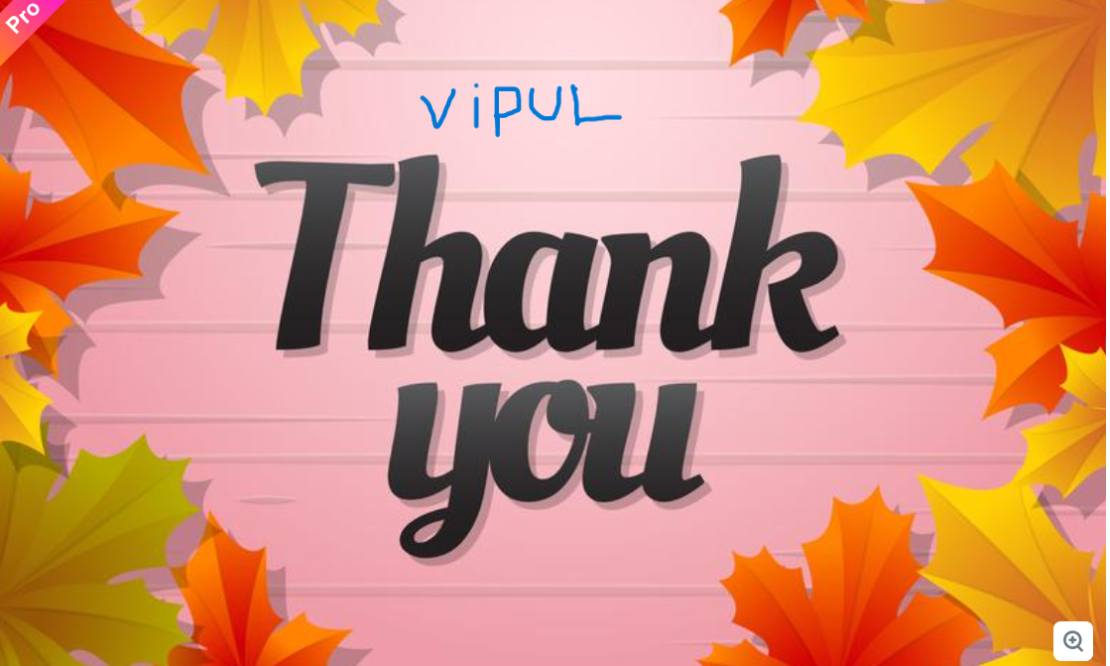

In [2]:
from IPython.display import Image, display
display(Image(filename=r"C:\Users\vipul\OneDrive\Documents\datatrained\CAPSTONE PROJECT\Screenshot 2024-06-18 171026.png"))